# Exploration Project 03

### Regression - My first Kaggle competition just follow along

이번 프로젝트에서는 국내 최대 캐글 커뮤니티인 [캐글코리아(Kaggle Korea)](https://www.facebook.com/groups/KaggleKoreaOpenGroup/)가

2019년에 주최했던 캐글 경진대회인 2019 2nd ML month with KaKR 을

처음부터 끝까지 직접 경험해 보는 프로젝트이다.

데이터를 활용하고, EDA 작업등을 수행하고,

여러 라이브러리를 활용해 데이터를 다루면서 다양한 모델들을 학습시켜보고,

예측 결과를 도출하는 것 까지의 과정에 더해서

캐글의 경진대회에 참여를 해서 직접 문제를 해결해 보는 과정을 수행할 것이다.

##### 프로젝트의 목표는 다음과 같다.

 - 데이터 사이언스 관련 최대 커뮤니티인 캐글의 경진대회에 직접 참여해서 문제를 해결해본다.

 - 캐글에서 데이터를 내려받는 것으로부터 시작해서,<br>
  로컬 서버에서 자유롭게 다루어보며 문제 해결을 위한 고민을 해본다.

 - 앙상블 기법의 개념과 강점을 이해하고,<br>여러 모델의 예측 결과를 Averaging 한 최종 결과로 캐글에 제출해본다.

 - 하이퍼 파라미터 튜닝의 필요성과 의미를 이해하고, Grid Search, Random Search 등의 기법을 알아본다.

 - Grid Search 기법을 활용해서 직접 하이퍼 파라미터 튜닝 실험을 해보고, 모델의 성능을 최대한 끌어올려본다.

 

## 1. 대회의 시작

### 1) 참가 규칙 살펴보기

참가규칙에 대해서는 참가할 대회 페이지에 접속을 해서 살펴보면 될 것이다.

기본적으로 캐글 코리아에서 주최한 대회인 만큼,

Description, Discussion 등등 많은 부분에서 한글을 발견할 수 있다.

기본적으로는 메인페이지에서 Introduction 살펴보는 것에서 부터 시작하자.

[캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)

### 2) 데이터 살펴보기

복잡한 데이터를 다루는 대회일수록, 데이터의 설명을 굉장히 꼼꼼하게 읽는 것도 중요하다.

Data Description 부분을 살펴보면 데이터에 관한 설명 요약을 찾아볼 수 있다.

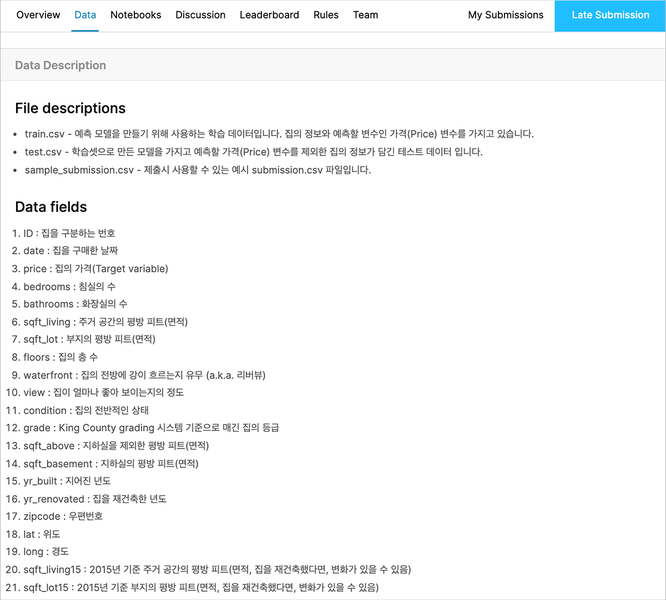

여기에서 예측해야 할 타겟(컬럼)은 주택의 가격(price) 라는 것을 확인 할 수 있다.

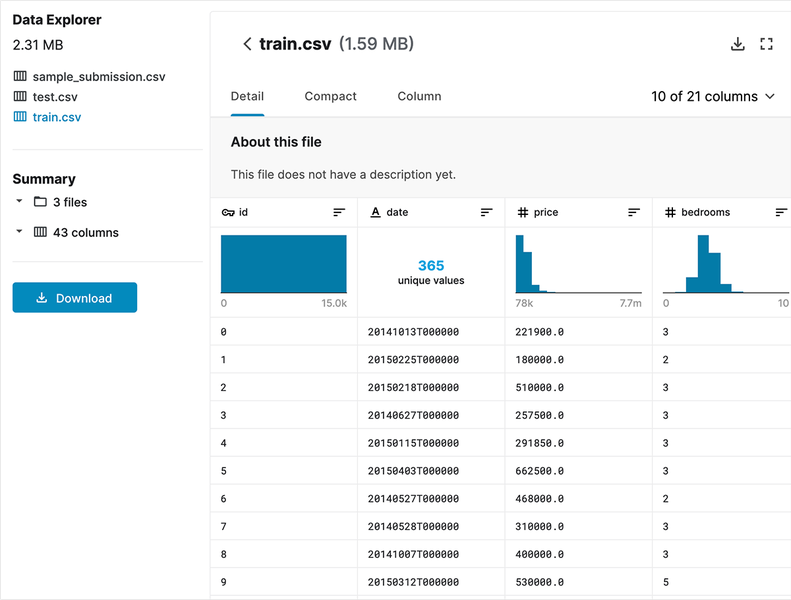


데이터에 대한 설명 외에도, 다운받아야 할 데이터 파일에 대한 형태도 살펴볼 수 있다.

이 대회에서는 3개의 파일이 제공된다.

 - train.csv : 모델 학습용 파일

 - test.csv : 테스트용 파일(실제 문제)

 - sample_submission.scv : 제출용 샘플 파일

정리하면 다음과 같다.

train.csv 를 활용해서 데이터를 뜯어보고 모델을 학습 시킨 후,

test.csv 파일의 데이터에 대해 price 를 예측해서

sample_submission.csv의 형식에 맞는 형태로 캐글에 제출을 해볼 것이다.


### 2) 일단 제출 Baseline 모델

이 대회에서는 주최측에서 Baseline 을 제공하고 있다.

Baseline 라는 것은 기본적으로 문제 해결을 시작할 때

쉽게 접근해 사용해 볼 수 있도록 제공하는 샘플을 말한다.

Baseline 커널은 아래의 링크에서 확인할 수 있다.

 - [2019 ML month 2nd baseline 커널](https://www.kaggle.com/kcs93023/2019-ml-month-2nd-baseline)

Baseline 커널을 다운로드 받거나 코드를 돌려볼 수 있다.

Baseline 내용에 대해서는 이전에 충분히 실습을 해 봤으며,

프로젝트를 진행하는 과정에서 어차피 살펴보게 될 내용들이기 때문에

여기에서는 생략하기로 하겠다.

## 2. 랭킹을 올리고 싶다면

우선 필요한 라이브러리들을 import 하는 것에서 부터 시작한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error      # RMSE 점수를 계산하기 위함

from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import GridSearchCV


데이터 가져오는것은 특별히 달라진 점이 없다.

In [52]:
## 데이터 가져오기
train = pd.read_csv("Data\\train.csv")
test = pd.read_csv("Data\\test.csv")

데이터를 확인 해 보자

In [53]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [54]:
train.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
15034,15034,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


컬럼의 데이터타입이나 결측허용여부등을 확인해보자.

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

date 컬럼의 값이 숫자가 아니다.

숫자로 바꾸자

In [56]:
## datetime 의 자료형을 datetime 자료형으로 변경.
if (train["date"].dtype.name == "object") : ## 반복 실행해도 영향 없게
    train["date"] = train["date"].apply(lambda i: i[:6]).astype(int)    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  int32  
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [57]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


타겟 데이터에 해당하는 price 컬럼은

y 변수에 price 컬럼을 넣어두고, train 에서는 price 컬럼을 삭제

In [58]:
y = train["price"]

In [59]:
train = train.drop(columns="price", errors="ignore")
train.tail()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15030,15030,201410,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,201503,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,201405,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,201502,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
15034,15034,201410,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


id 컬럼도 필요 없으니 제거한다.

In [60]:
train = train.drop(columns="id", errors="ignore")
train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,201410,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,201503,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,201405,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,201502,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


test 도 타입을 맞춰준다.

※ 주의사항 : test 에는 타겟 데이터에 해당하는 price 컬럼이 없음에 주의

In [61]:
print("━" * 64)
print("test[\"date\"].dtype.name :", test["date"].dtype.name, end=" ▶ ")

## datetime 의 자료형을 datetime 자료형으로 변경.
if (test["date"].dtype.name == "object") : ## 반복 실행해도 영향 없게
    test["date"] = test["date"].apply(lambda i: i[:6]).astype(int) 

print("test[\"date\"].dtype.name :", test["date"].dtype.name)
print("━" * 64)

test.info()

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
test["date"].dtype.name : object ▶ test["date"].dtype.name : int32
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   int32  
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   

In [62]:
test = test.drop(columns="id", errors="ignore") ## id 도 필요치 않다.
test.drop(columns="price", errors="ignore")     ## 애초에 price 컬럼이 없으니 동작하지 않지만.

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6468 non-null   int32  
 1   bedrooms       6468 non-null   int64  
 2   bathrooms      6468 non-null   float64
 3   sqft_living    6468 non-null   int64  
 4   sqft_lot       6468 non-null   int64  
 5   floors         6468 non-null   float64
 6   waterfront     6468 non-null   int64  
 7   view           6468 non-null   int64  
 8   condition      6468 non-null   int64  
 9   grade          6468 non-null   int64  
 10  sqft_above     6468 non-null   int64  
 11  sqft_basement  6468 non-null   int64  
 12  yr_built       6468 non-null   int64  
 13  yr_renovated   6468 non-null   int64  
 14  zipcode        6468 non-null   int64  
 15  lat            6468 non-null   float64
 16  long           6468 non-null   float64
 17  sqft_living15  6468 non-null   int64  
 18  sqft_lot

모든 컬럼의 데이터타입이 숫자형인것을 확인

타겟 데이터 y 확인

In [63]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

가격 y 의 분포 확인

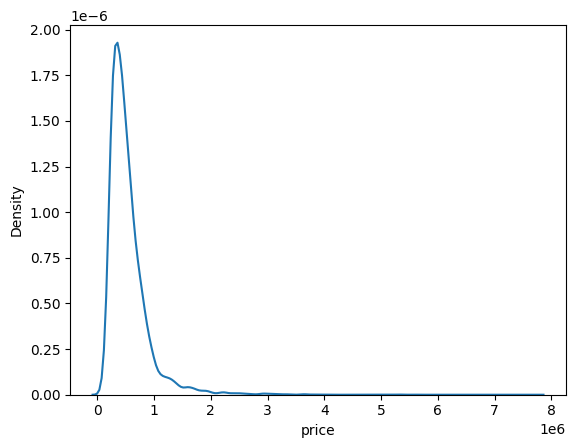

In [64]:
sns.kdeplot(y)
plt.show()

price는 왼쪽으로 크게 치우쳐 있는 형태를 볼 수 있다.

따라서 y 는 np.log1p() 함수를 통해 로그 변환을 해주고, 

나중에 모델이 값을 예측한 후에 다시 np.expm1()을 활용해서 되돌리는 방식을 선택.<br>
（np.expm1()은 np.log1p()과는 반대로 각 원소 x마다 exp(x)-1의 값을 반환）

 - [numpy.log1p](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html)

 - [numpy.expm1](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html)

다음 코드에서 y 를 완만한 정규분포의 형태로 변환

<AxesSubplot:xlabel='price', ylabel='Density'>

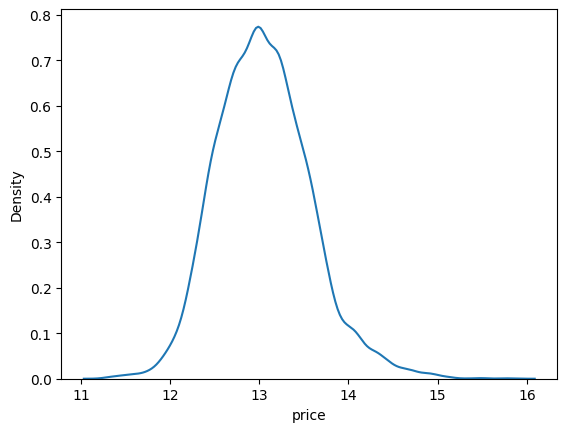

In [65]:
y = np.log1p(y)
sns.kdeplot(y)

RMSE

y_test 나 y_pred 는 위에서 np.log1p()로 변환이 된 값이기 때문에

원래 데이터의 단위에 맞게 되돌리기 위해 np.expm1()을 추가해야 한다.

아래의 코드에 반영해서 정의했다.

In [66]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

XGBRegressor, LGBMRegressor, GradientBoostingRegressor, RandomForestRegressor

4가지 모듈을 준비

In [67]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

모델들의 인스턴스를 생성한 후 models 라는 리스트에 넣고

random_state를 고정값으로 지정하여

모델과 데이터셋이 동일한 경우, 머신러닝 학습결과도 항상 동일하도록 구성한다.

In [140]:
random_state = 2022 # 다른 모델들도 동일한 random_state 가지도록 지정

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]  ## 모델들의 인스턴스들

각 모델의 이름은 다음과 같이 클래스의 \_\_name\_\_ 속성에 접근해서 얻을 수 있다

In [69]:
gboost.__class__.__name__

'GradientBoostingRegressor'

이름을 통해 각 모델 별로 학습 및 예측하고 각 모델들의 RMSE 값을 얻는 함수를 아래에 구현.

In [70]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:

        ## 모델의 이름 가져온다
        model_name = model.__class__.__name__
        
        ## 학습／테스트 데이터 분리 여기에서도 random_state를 고정
        X_train, X_test, y_train, y_test = \
            train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)         ## 모델 학습
        y_pred = model.predict(X_test)      ## 회귀 예측
        
        df[model_name] = rmse(y_test, y_pred)   ## 예측 결과 RMSE 값 저장

        ## dataframe 에 저장
        score_df = pd.DataFrame(df, index=["RMSE"]).T.sort_values("RMSE", ascending=False)
        
    return score_df

get_scores(models, train, y)

,RMSE
RandomForestRegressor,136504.108641
GradientBoostingRegressor,130361.233685
XGBRegressor,127865.518476
LGBMRegressor,120099.067237


다양한 하이퍼 파라미터로 실험을 위해

sklearn.model_selection 라이브러리 안에 있는 GridSearchCV 클래스를 활용

In [71]:
from sklearn.model_selection import GridSearchCV

최적의 모델을 찾아서, 하이퍼 파라미터 튜닝

<hr>

모델 파라미터는 모델이 학습을 하면서 점차 최적화되는,

그리고 최적화가 되어야 하는 파라미터이다.

모델은 학습 과정을 거치면서 최적의 y_pred 값, 즉 y_true에 가장 가까운 값을

출력해낼 수 있는 최적의 W를 찾아나가게 된다.

반면, 하이퍼 파라미터는 모델이 학습을 하기 위해서

사전에 사람이 직접 입력해 주는 파라미터이다.

이는 모델이 학습하는 과정에서 변하지 않는다.

예를 들어 학습 횟수에 해당하는 epoch 수, 

가중치를 업데이트할 학습률(learning rate), 

또는 선형 규제를 담당하는 labmda 값 등이 이에 해당한다.

그리드 탐색과 랜덤 탐색

<hr>

두 가지 모두 하이퍼 파라미터를 조합해 보는 방법이다.

- 그리드 탐색 : 사람이 먼저 탐색할 하이퍼 파라미터의 값들을 정해두고,<br>
그 값들로 만들어질 수 있는 모든 조합을 탐색. <br>
특정 값에 대한 하이퍼 파라미터 조합을 모두 탐색하고자 할 때 유리.

- 랜덤 탐색 : 사람이 탐색할 하이퍼 파라미터의 공간만 정해두고,<br>
그 안에서 랜덤으로 조합을 선택해서 탐색하는 방법.

그리드 탐색에서는 사람이 정해둔 값들로 이루어지는 조합만 탐색하기 때문에 최적의 조합을 놓칠 수 있는 반면,

랜덤 탐색에서는 말 그대로 랜덤으로 탐색하기 때문에 최적의 조합을 찾을 수 있는 가능성이 언제나 열려 있음..

하지만 그 가능성 또한 랜덤성에 의존하기 때문에 언제나 최적을 찾는다는 보장은 없다.

다음 이미지는 그리드 탐색(grid search)과 랜덤 탐색(random search) 두 가지를 잘 나타내고 있다.

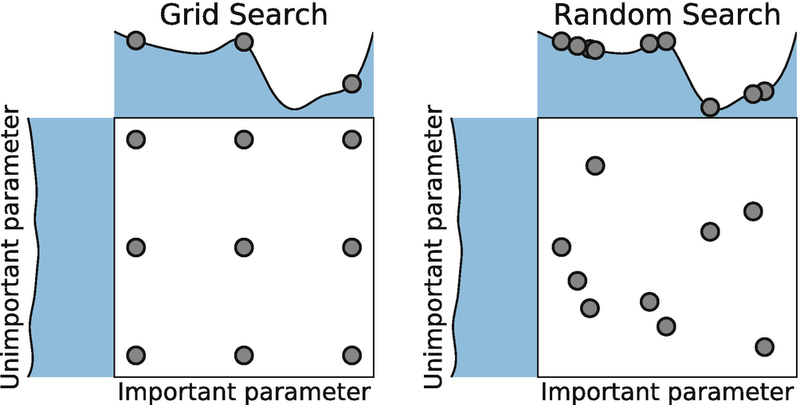

그리드 탐색은 정해진 하이퍼 파라미터의 조합을 격자와 같이 탐색하는 반면, 

랜덤 탐색은 랜덤으로 점을 찍어서 탐색한다.

그리드 탐색의 탐색 공간은 매우 제한적인 반면 랜덤 탐색은 탐색하는 공간이 훨씬 넓다.

따라서 파라미터를 입력하면 가능한 모든 조합을 탐색하는 사이킷런의 GridSearchCV를 활용하겠다.

GridSearchCV

<hr>

- param_grid : 탐색할 파라미터의 종류 (딕셔너리로 입력)

- scoring : 모델의 성능을 평가할 지표

- cv : cross validation을 수행하기 위해 train 데이터셋을 나누는 조각의 개수

- verbose : 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지의 양<br>
(숫자가 클수록 더 많은 메세지를 출력)

- n_jobs : 그리드 탐색을 진행하면서 사용할 CPU의 개수


In [72]:
## param_grid에 탐색할 xgboost 관련 하이퍼 파라미터를 넣는다
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [1, 10],
}
## 모델을 지정
model = LGBMRegressor(random_state=random_state)

## 다음과 같이 GridSearchCV를 이용해서 grid_model 모델을 초기화하고, 
## train과 y 데이터로 모델을 간단히 학습시키면
##  param_grid 내의 모든 하이퍼 파라미터의 조합에 대해 실험이 끝난다.
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring="neg_mean_squared_error", \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2022), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [73]:
## 실험에 대한 결과는 다음과 같이 grid_model.cv_results_ 안에 저장
grid_model.cv_results_

{'mean_fit_time': array([0.08756542, 0.12027631, 0.21442599, 0.32053952]),
 'std_fit_time': array([0.0081367 , 0.00715513, 0.00274945, 0.03496195]),
 'mean_score_time': array([0.0073802 , 0.01296549, 0.01914892, 0.03191433]),
 'std_score_time': array([0.00048914, 0.00089212, 0.00263129, 0.00472013]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [74]:
## 파라미터 조합은 위 딕셔너리 중 params에, 

params = grid_model.cv_results_["params"]
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [75]:
## 각각에 대한 테스트 점수는 mean_test_score에 저장되어 있다.
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

neg_mean_squared_error를 사용했기 때문에 점수가 음수로 표현이 되고 있다.

데이터프레임 형태를 변경해보자

In [76]:
results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.073394
1,1,100,-0.055020
2,10,50,-0.029177
3,10,100,-0.027027


In [77]:
## score 의 값은
## 음수로 된 MSE 였으니, -1 을 곱해주고 np.sqrt로 루트 연산을 해주는
## 간단한 변환을 거치면 RMSE 점수를 확인 할 수 있다.
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


하지만 아직도 RMSE와는 값의 크기가 아주 다른 것 같다.

그 이유는 price에 있다. 

이전에 price의 분포가 한쪽으로 치우쳐져 있는 것을 보고 log 변환을 했었는데,

그 후 RMSE 값을 계산하기 위한 함수에서

np.expm1 함수를 활용해 다시 원래대로 복원한 후 RMSE 값을 계산했었다.

하지만 그리드 탐색을 하면서는 np.expm1()으로 변환하는 과정이 없었기 때문에

log 변환되어 있는 price 데이터에서 손실함수값을 계산한 것이다.

따라서 사실, 위의 데이터 프레임에 나타난 값은

정확히 말하면 RMSE가 아니라 RMSLE, 즉 Root Mean Squared Log Error 값이 된다.

log를 취한 값에서 RMSE를 구했다는 의미로,

이에 맞게 컬럼의 이름을 RMSLE로 변환해 주자.

판다스에서 컬럼의 이름 변환은 rename으로 할 수 있다.

In [78]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


마지막 할 일은 RMSLE가 낮은 순서대로 정렬하는 것으로, sort_values 를 사용한다.

- [pandas.DataFrame.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [79]:
results = results.sort_values(by='RMSLE', ascending=True)
results

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


지금까지의 과정을 하나의 함수로 만들면 아래와 같다.

In [80]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    
    # GridSearchCV 모델로 초기화
    grid_model = \
        GridSearchCV( \
            model, \
            param_grid=param_grid, \
            scoring="neg_mean_squared_error", \
            cv = 5, \
            verbose=verbose, \
            n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_["params"]
    score = grid_model.cv_results_["mean_test_score"]
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results["score"] = score
    
    # RMSLE 값 계산 후 정렬
    results["RMSLE"] = np.sqrt(-1 * results["score"])
    results = results.sort_values("RMSLE")

    return results

이 함수로 그리드 탐색을 수행해보자.

In [81]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


표를 통해서 확인 할 수 있는 가장 좋은 조합은

max_depth=10, n_estimators=100 이다.

이 모델로 학습을 수행하고 예측값인 submission.csv 파일을 만들어서 제출해보자.

In [82]:
## 가장 좋은 조합으로 모델을 준비하고, 학습 및 예측 결과를 생성 해봤다.
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction = np.expm1(prediction)       ## 원래 스케일로
prediction

array([ 506766.66784595,  479506.10405112, 1345155.15609376, ...,
        449515.92243642,  327402.87855805,  426332.71354302])

sample_submission.csv 파일을 가져온다

In [83]:
data_dir = "Data\\"
submission_path = data_dir + "sample_submission.csv"
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


이 데이터프레임에 모델의 예측한 값을 덮어씌우고 csv 파일로 저장하자.

추가적으로, 파일명에 모델의 종류와 위에서 확인했던 RMSLE 값을 넣어주면

다수의 제출 파일들을 깔끔하게 관리 할 수 있을것이니 이 과정도 추가하여

하나의 함수로 정리하면 다음과 같다.

In [84]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    
    ## 모델을 `train`, `y`로 학습
    model.fit(train, y)

    ## `test`에 대해 예측        
    prediction = model.predict(test)

    ## 예측값을 `np.expm1`으로 변환
    prediction = np.expm1(prediction)
    
    data_dir = "Data\\"
    submission_path = data_dir + "sample_submission.csv"
    
    ## submission 데이터 불러옴
    submission = pd.read_csv(submission_path)
    
    ## submission 템플릿 맞춤 - 에측 가격 반영
    submission["price"] = prediction            
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'\
        .format(data_dir, model_name, rmsle)

    ## submission 파일 저장
    submission.to_csv(submission_csv_path, index=False)
    
    print('{} saved!'.format(submission_csv_path))

이 함수를 사용한다면 다음 한 줄로 모델을 학습시킨 후 예측 결과를 저장할 수 있다.

In [85]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

Data\/submission_lgbm_RMSLE_0.0168.csv saved!


그리고 이것을 올린 결과는 다음과 같다.

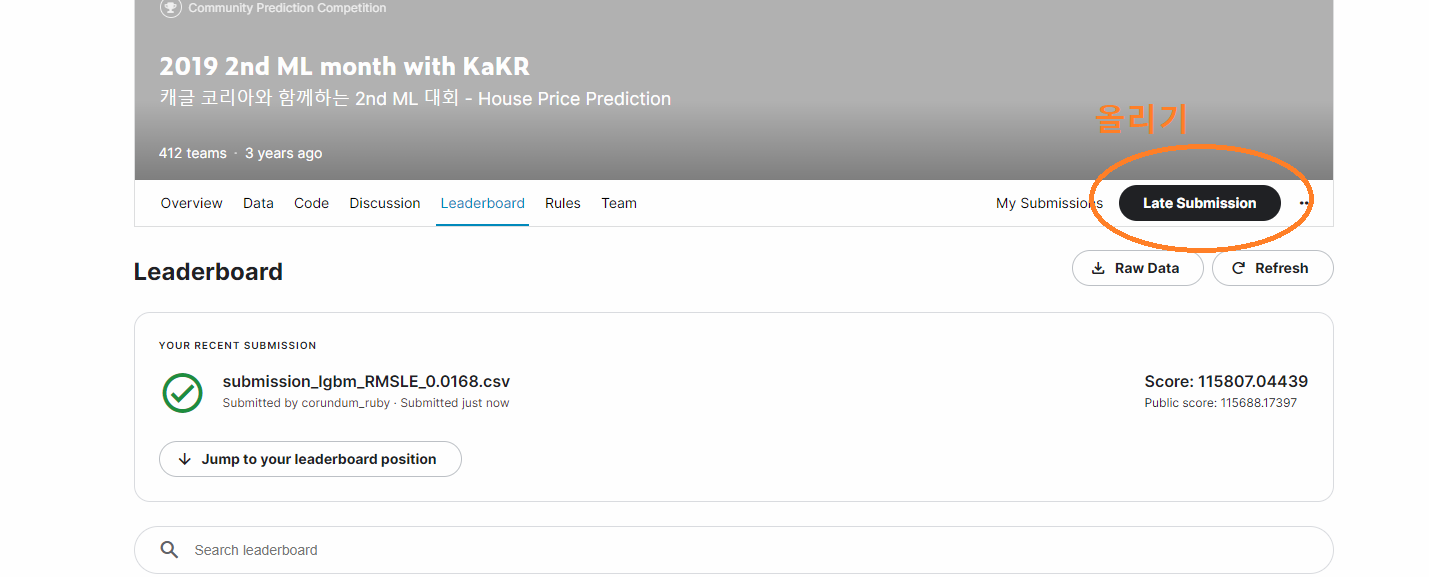

115807.04439 점을 얻었다.

튜닝을 해 보자.

<hr>

# 2. 프로젝트：Leaderboard를 정복

여기서부터는 사실상 처음부터 다시 하는 과정이라 보면 된다.

모델의 학습은 둘째치고 우선 초기 데이터셋의 정리를 좀 실행해 볼 까 한다.

후반부에 적용한 함수 등은 재활용 하겠지만,

데이터를 가져오고 EDA를 수행하며 여러가지 시도를 해 볼까 한다.

기존에 수행했던 EDA 과정이나 피쳐 엔지니어링등 비슷한 과정이 반복 될 수 있지만

여러가지 시도를 해 보는 과정과, 그 과정에서 학습 및 알아낸 내용들,

참고한 내용, 성능을 끌어올리기 위한 다양한 접근 방법에 대한 생각이나 느낀점들을

중간중간 기록을 하는 방향으로 진행하였다.

후반부에는 루브릭 수행 과제 때문에 내용보다는

코드 위주의 리포트의 방향으로 간 듯한 느낌이 있지만,

기록이 부족하다 싶은 부분은, 편집 과정에서 따로 정리 하거나 하였다.

### 1) 첫번째 시도

In [86]:
## 학습 보내기 전까지 여기서 다시 EDA를 수행해 볼 까 한다

## 데이터 가져오기
train = pd.read_csv("Data\\train.csv")
test = pd.read_csv("Data\\test.csv")

그리고 여기까지도 어차피 필수로 해야 할 작업이니 미리 해두어서 나쁠 건 없다.

In [87]:
## date 컬럼의 자료형을 datetime 자료형으로 변경.
if (train["date"].dtype.name == "object") : ## 반복 실행해도 영향 없게
    train["date"] = train["date"].apply(lambda i: i[:6]).astype(int)    

if (test["date"].dtype.name == "object") : ## 반복 실행해도 영향 없게
    test["date"] = test["date"].apply(lambda i: i[:6]).astype(int) 

## id 컬럼 제거
train = train.drop(columns="id", errors="ignore")
test = test.drop(columns="id", errors="ignore")

date 컬럼의 자료형 변경과 id 컬럼 제거를 수행했으면

초심으로 돌아가서 데이터를 다시 한번 조사해 보자

<hr>

우선 일반적으로 집값에 가장 영향을 끼칠듯한 요소는 아무래도 입지가 아닐까.

한국이야 부동산에서 1순위로 고려사항이 입지인데,

다른 나라라고 해서 다르진 않겠나 생각했다.

입지를 찾아 볼 수 있는 요소가 뭐가 있을까ㅡ 우편번호면 괜찮지 않을까？

위도와 경도를 나타내는 컬럼도 있는데, 그건 두개의 컬럼으로 나뉘어져 있고,

우편번호는 하나로 통합되어 있으니, 기왕이면 우편번호를 보는게

입지를 파악하는데 유리하겠다는 생각이 들었다.

또한 위도와 경도의 조합까지 고려한다는 것은,

오히려 학습의 정확도를 떨어뜨리는게 아닐까 하는 생각도 들었다.

우리가 흔히 말하는 상급지 하급지 등을 이야기 할 때 같이 말하는 "동네순위" 라는 것은

보통 평당가(면적대비 가격)가 높은 동네를 상급지라고 표현하는데

이 지표를 만드는 것도 괜찮을 거 같다는 생각이 잠깐 들었었다.

잠깐, 근데 이게 아파트가 많은 동네일까？

아파트야 어느정도 평당가가 정해져 있고 세대수도 많고 하니까

우리나라에서야 편하게 그정도만 따져보면 어느정도 시세를 파악할 수 있는데,

이 동네는 그런게 아닐거 같은데

In [88]:
## 층수를 확인해 보았다.
train["floors"].value_counts().sort_index()

1.0    7361
1.5    1330
2.0    5810
2.5     113
3.0     417
3.5       4
Name: floors, dtype: int64

반층은 뭐지…？ 하는 생각이 들었는데, 역시나 이건 공동주택 자료는 아닌 것 같다.

그렇다면, 평당 시세를 계산해서 우편번호를 줄 세운다 해도

다른 생각해야 할 변수가 많이 생긴다.

집의 전반적인 상태, King Country grading 시스템 기준으로 매긴 집의 등급,

지하실, 지하실을 제외한 면적, 지어진 년도…

그렇다면 평당 가격을 평균 해봐야 큰 의미가 없을 것 같다.

그러면 평당 가격으로 줄세우는것은 하지 말더라도,

위도와 경도 두개의 컬럼이 학습에 큰 도움이 될 거 같지 않고,

복잡해지기만 할 거 같아서 이거 두개는 빼고 해 보자.

그리고 sqft_living15 컬럼의 경우 2015년 기준 주거 공간의 면적을 나타내고

sqft_lot15 컬럼의 경우 대지의 면적을 표현한다고 했는데,

이것이 큰 의미가 있어 보이진 않는데, 어느정도 가치가 있을지 한번 알아보자.

간단하게 sqft_living 와 sqft_lot 와 각각 비교해 보면 될 거 같다.

In [89]:
## 여기서는 시간관계상 SQL 을 쓰도록 하겠다
from pandasql import sqldf

dftemp = sqldf("select count(*) as totcnt from train")
print(dftemp)

dftemp = sqldf("select count(*) as lotdif from train where sqft_lot <> sqft_lot15")
print(dftemp)

dftemp = sqldf("select count(*) as livdif from train where sqft_living <> sqft_living15")
print(dftemp)


   totcnt
0   15035
   lotdif
0   11920
   livdif
0   13258


이게 어떻게 된 일인지, 몹시 당황스럽다.

전체 데이터가 15035 건인데, 2015년 대비 차이나는 건수가 이렇게 많다고？

어째서 이런 일이 나타나는지 이유를 모르겠다. 면적이 차이가 날 수가 있나？

데이터가 잘못된 무언가가 있는것인지 한번 전체적인 내용을 확인해 보겠다

대소관계를 구분해서 찾아보면 괜찮지 않을까

In [90]:
dftemp = sqldf("select count(*) as lotdif_up from train where sqft_lot > sqft_lot15")
print(dftemp)
dftemp = sqldf("select count(*) as lotdif_down from train where sqft_lot < sqft_lot15")
print(dftemp)

   lotdif_up
0       6002
   lotdif_down
0         5918


15년 대비 면적이 커진게 6002건, 작아진게 5918건이라니 상당히 당황스럽다.

아무래도 이 컬럼 없애지 말고, 남겨야 할 것 같다.

뭐 또 다른거 없나 살펴보다보니…

In [91]:
dftemp = sqldf("select count(*) from train where sqft_living <> (sqft_above + sqft_basement)")
print(dftemp)

   count(*)
0         0


sqft_living 은 sqft_above 와 sqft_basement 를 합한 값인것 같아서

혹시 이 공식이 성립하지 않는지 찾아보니 나오지 않는걸로 봐서는 이건 맞는 공식인 것 같다.

In [92]:
## value_counts() 함수 : bedrooms 열의 고유값의 갯수를 가져온다.
## .sort_index() 추가하면 값의 순서대로 정렬 .sort_index(ascending=False) 는 역순
train["bathrooms"].value_counts().sort_index().head(20)

0.00       4
0.50       3
0.75      45
1.00    2675
1.25       5
1.50    1009
1.75    2112
2.00    1357
2.25    1433
2.50    3748
2.75     843
3.00     493
3.25     410
3.50     510
3.75     108
4.00     100
4.25      57
4.50      64
4.75      16
5.00      14
Name: bathrooms, dtype: int64

In [93]:
## value_counts() 함수 : bedrooms 열의 고유값의 갯수를 가져온다.
## .sort_index() 추가하면 값의 순서대로 정렬 .sort_index(ascending=False) 는 역순
train["bedrooms"].value_counts().sort_index()

0        4
1      133
2     1931
3     6835
4     4797
5     1108
6      188
7       22
8       10
9        5
10       2
Name: bedrooms, dtype: int64

화장실하고 침실의 경우 구간을 어떻게 좀 줄이는게 좋을 것 같은데,

어떻게 하는게 좋을지 판단이 들지 않는다. 일단 남길까

In [94]:
## 타겟 데이터에 해당하는 price 컬럼은
## y 변수에 price 컬럼을 넣어두고, train 에서는 price 컬럼을 삭제
y = train["price"]
train = train.drop(columns="price", errors="ignore")

##  y 를 완만한 정규분포의 형태로 변환
y = np.log1p(y)

In [95]:
get_scores(models, train, y)

,RMSE
RandomForestRegressor,136504.108641
GradientBoostingRegressor,130361.233685
XGBRegressor,127865.518476
LGBMRegressor,120099.067237


기존의 get_scores 결과이다


|Regressor|RMSE|
|----|----|
|RandomForestRegressor	|136504.108641
|GradientBoostingRegressor	|130361.233685
|XGBRegressor	|127865.518476
|LGBMRegressor	|120099.067237

그리드 탐색을 좀 더 해볼까

In [99]:
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
0,10,200,-0.026188,0.161828
2,20,200,-0.026245,0.162003
1,10,500,-0.026245,0.162004
3,20,500,-0.026340,0.162295


기존의 LGBMRegressor 그리드 탐색 결과이다
|max_depth	|n_estimators	|score	|RMSLE|
|----|----|----|----|
|10	|100	|-0.027027	|0.164399|
|10	|50	|-0.029177	|0.170814|
|1	|100	|-0.055020	|0.234564|
|1	|50	|-0.073394	|0.270914|

In [97]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.1618')

Data\/submission_lgbm_RMSLE_0.1618.csv saved!


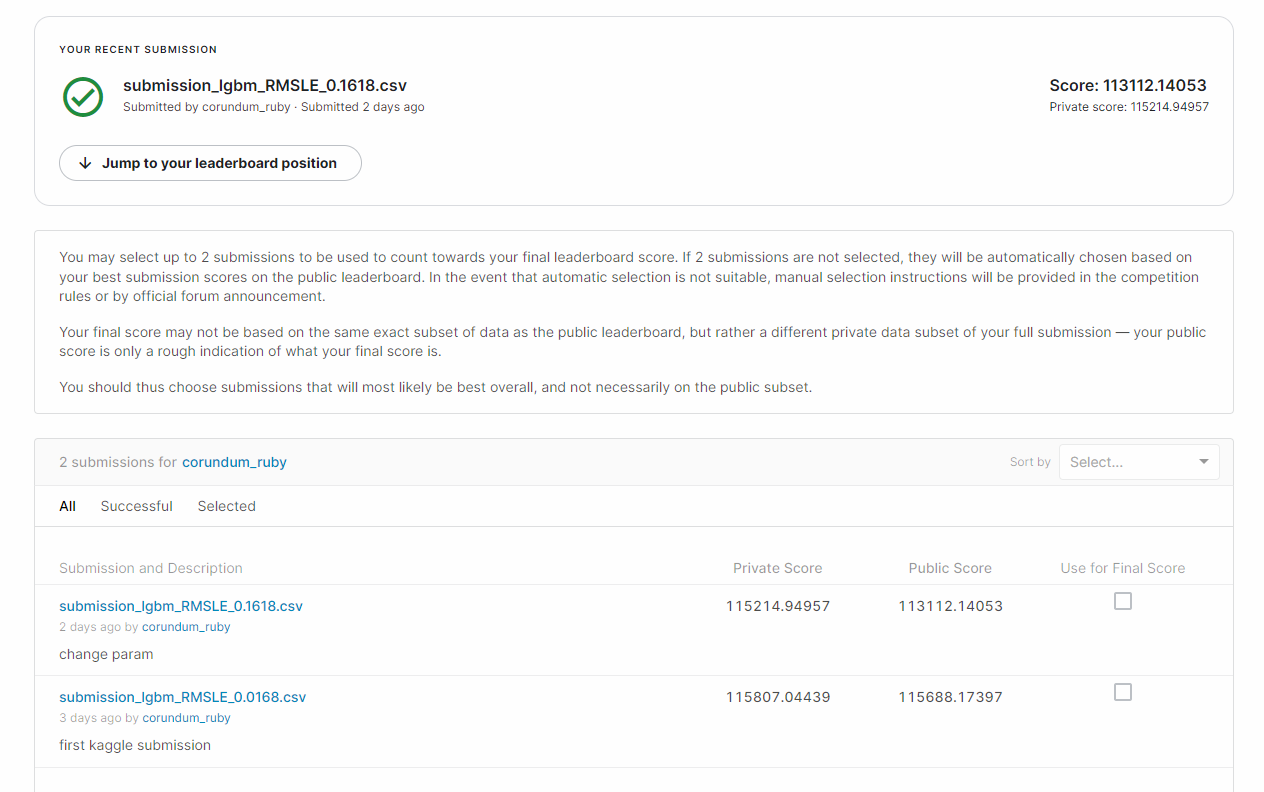

# 쉽지 않네…

빼먹은건 없는 것 같은데, 이전 프로젝트들은 보통 일단 마무리 하면

평가지표 대부분 턱걸이 내로 들어왔는데, 이번것은 잘 안된다.

<hr>

## 2) 두번째 시도

내가 혹시 생각하지 못했거나, 수행하지 않았지만 필요한 과정이라고

생각되는 요소가 무엇이 있을지 baseline 내용을 한번 둘러보았다.

우선… 데이터 불러왔다.

- 결측치：확인 했다. 깨끗하다.

- id, date 변수 정리：id 정리 했다.<br>&nbsp;&nbsp;&nbsp;&nbsp;date 변수는 『연월』 까지만 고려하는 범주형 변수로 만들었다는데, 범주형이 뭔지 모르겠다.

- 각 변수들의 분포 확인：price 말고는 손을 안댔었는데, 필요한 것들 전부 적용해 보겠다.<br>&nbsp;&nbsp;&nbsp;&nbsp;한쪽으로 치우친 분포는 모델이 결과를 예측하기에 좋지 않은 영향을 미치므로 다듬어 줄 필요가 있다고 한다.<br>&nbsp;&nbsp;&nbsp;&nbsp;log-scaling 를 통해 데이터분포를 정규분포에 가깝게 만들도록 하겠다.

- cv_score 는 get_scores 통해서 수행했다고 볼 수 있다.

이상의 내용으로 볼 때, 가장 먼저 테스트 해 볼 것은

치우친 분포를 정규분포에 가깝게 만드는 과정의 효과를 확인해 보고자 한다.

얼마나 효과가 있을지는 모르겠지만, 블렌딩은 이전에 적용 한 것 같다.

스태킹 앙상블 이전에 위의 작업들을 해 볼까 한다.

In [64]:
## 학습 보내기 전까지 여기서 다시 EDA를 수행해 볼 까 한다
## 데이터 가져오기
train = pd.read_csv("Data\\train.csv")
test = pd.read_csv("Data\\test.csv")

In [65]:
## date 컬럼의 자료형을 datetime 자료형으로 변경.
if (train["date"].dtype.name == "object") : ## 반복 실행해도 영향 없게
    train["date"] = train["date"].apply(lambda i: i[:6]).astype(int)    

if (test["date"].dtype.name == "object") : ## 반복 실행해도 영향 없게
    test["date"] = test["date"].apply(lambda i: i[:6]).astype(int) 

## id 컬럼 제거
train = train.drop(columns="id", errors="ignore")
test = test.drop(columns="id", errors="ignore")

In [66]:
## 타겟 데이터에 해당하는 price 컬럼은
## y 변수에 price 컬럼을 넣어두고, train 에서는 price 컬럼을 삭제
y = train["price"]
train = train.drop(columns="price", errors="ignore")

##  y 를 완만한 정규분포의 형태로 변환
y = np.log1p(y)

각 컬럼들의 시각화를 진행한다.

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


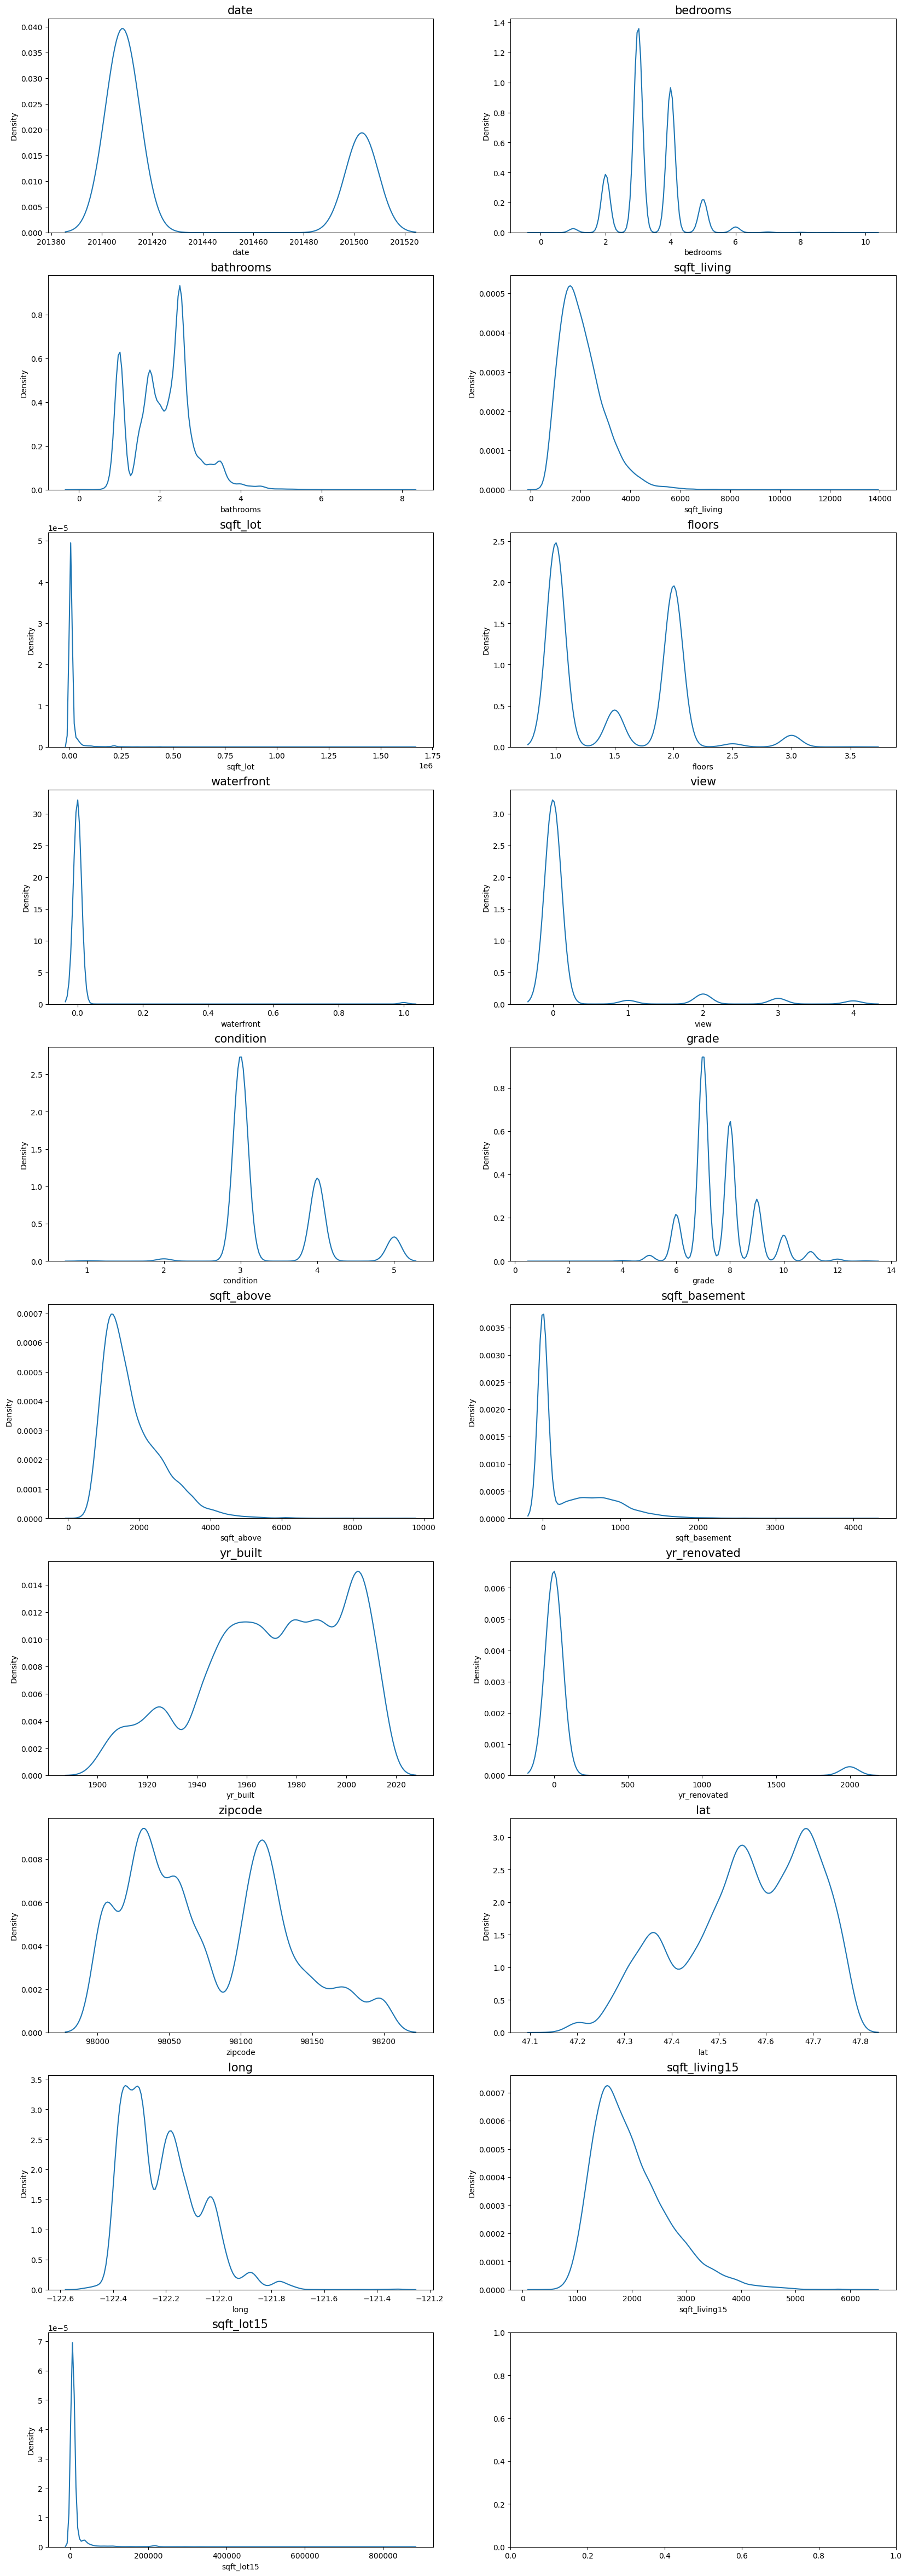

In [137]:
fig, ax = plt.subplots(10, 2, figsize=(20, 60))

count = 0
columns = train.columns

print(columns)

for row in range(10):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
        if count == 19 :
            break


막상 지금 그래프를 보니 확실히 조정을 할 필요성이 있어보인다.

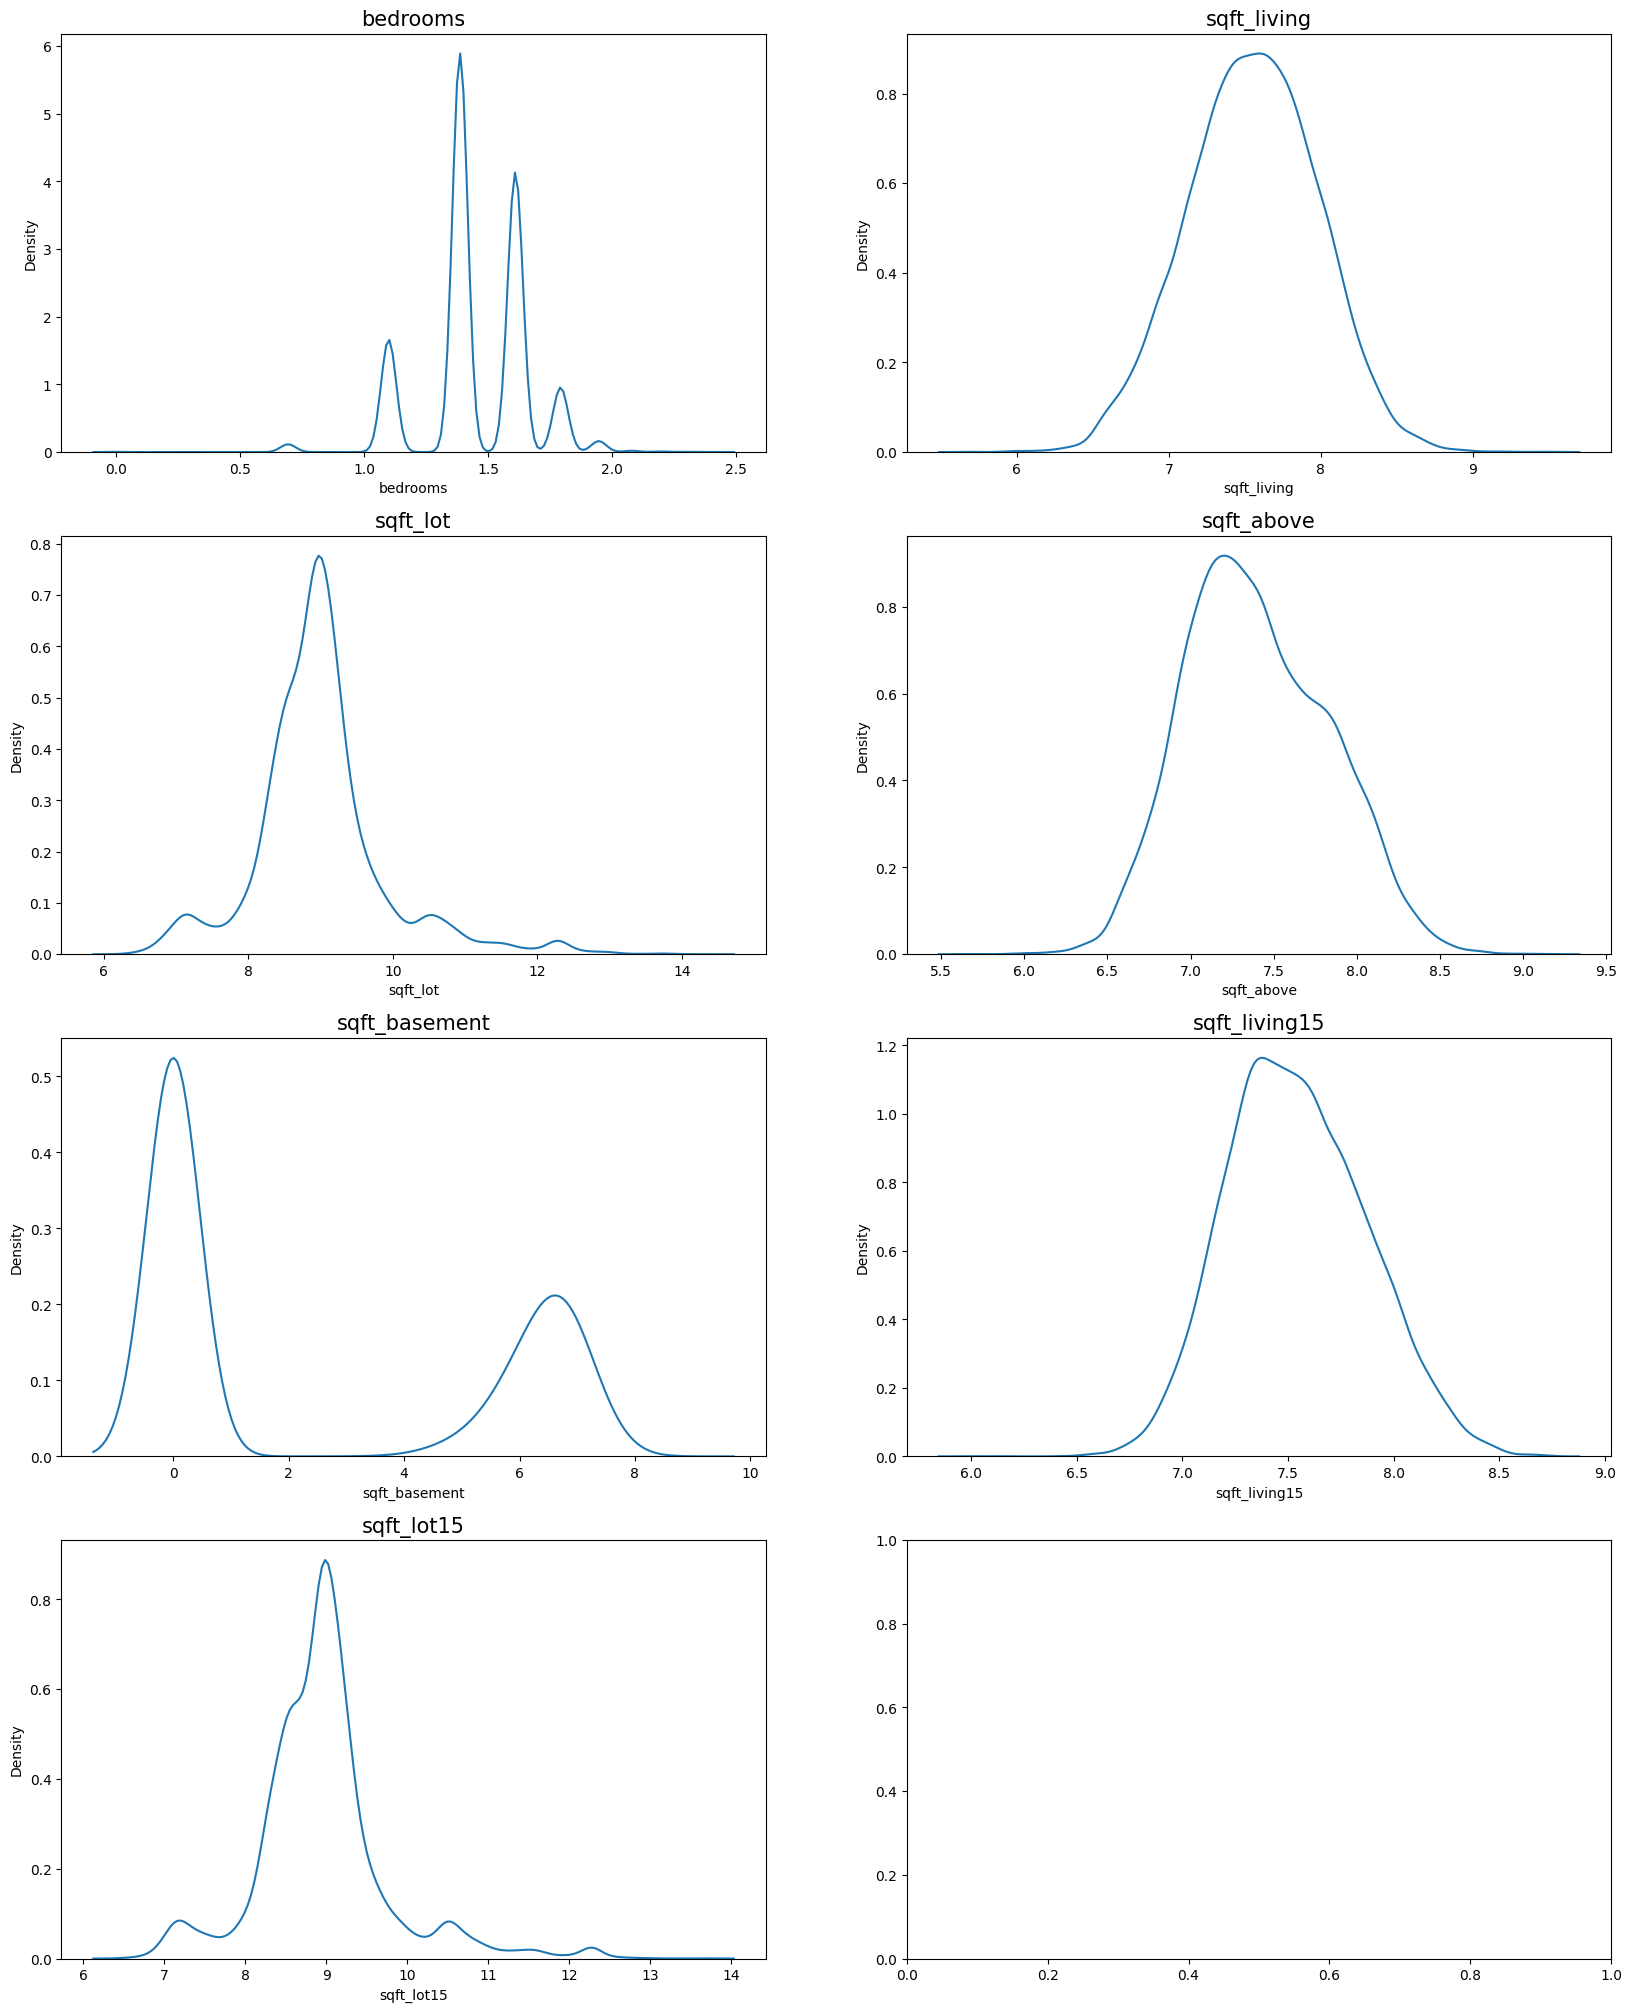

In [138]:
skew_columns = ["bedrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]

for c in skew_columns:
    train[c] = np.log1p(train[c].values)


fig, ax = plt.subplots(4, 2, figsize=(20, 25))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(train[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1

어떤 모델이 좋을지 돌려보자

In [143]:
get_scores(models, train, y)

,RMSE
RandomForestRegressor,136463.501115
GradientBoostingRegressor,130363.559558
XGBRegressor,127900.253831
LGBMRegressor,120307.155358


우선 RMSE 는 이전보다 더 올라갔다… 안좋아졌다는 느낌이다.

In [142]:
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=-1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
0,10,200,-0.026187,0.161824
1,10,500,-0.026241,0.161992
2,20,200,-0.026244,0.161999
3,20,500,-0.026340,0.162295


RMSLE 이전과 거의 동일하다

이 상태로는 이전과 별 다를 바 없는 것 같다.

<hr>

### 3) 세번째 시도

루브릭 달성을 위해서 두번째 시도 과정에서도 많은 실험을 수행하고 그 결과를 산출했지만,

대부분의 경우 루브릭 달성 조건에 미치지 못하는 결과를 확인하였다.


세번째 시도는, 지금까지보다 조금 더 EDA 와 피쳐 엔지니어링을 수행하는 것으로,

RMSE, RMSLE 값을 줄여나갈 수 있을거라고 생각했었다.

In [ ]:

## 1. 지하공간 면적 데이터를 토대로 살펴보니
## 지하 면적 0 인 데이터가 60.81％를 점유
tempdf = sqldf("select count(*) as totalcnt from train",)
tempdf = sqldf("select sqft_basement, count(sqft_basement) as basecount, \
    round((count(sqft_basement) * 1.0 / tempdf.totalcnt * 1.0) * 100, 2) as percent \
    from train, tempdf group by train.sqft_basement limit 5")
tempdf

,sqft_basement,basecount,percent
0,0,9143,60.81
1,10,1,0.01
2,20,1,0.01
3,40,2,0.01
4,50,7,0.05


In [ ]:
## 따라서 지하실이 있는가 없는가의 유무를 만들고, One-hot encoding 처리를 함.

## 컬럼 제거 - 중복 실행 방지 (train, test 적용)
train = train.drop(columns="isbasement", errors="ignore")
test = test.drop(columns="isbasement", errors="ignore")
## 지하실 유무 One-Hot encoding  처리   (train, test 적용)
train = sqldf("select *, iif(sqft_basement > 0, 1, 0) as isbasement from train")
test = sqldf("select *, iif(sqft_basement > 0, 1, 0) as isbasement from test")
train.tail()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,isbasement
15030,15030,201410,610685.0,4,2.50,2520,6023,2.0,0,0,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,0
15031,15031,201503,1007500.0,4,3.50,3510,7200,2.0,0,0,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,1
15032,15032,201405,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
15033,15033,201502,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
15034,15034,201410,325000.0,2,0.75,1020,1076,2.0,0,0,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,0


In [ ]:
## 비슷한 상황인 리모델링 연도도 확인해 보았다.
tempdf = sqldf("select count(*) as totalcnt from train",)
tempdf = sqldf("select yr_renovated, count(yr_renovated) as renovcount, \
    round((count(yr_renovated) * 1.0 / tempdf.totalcnt * 1.0) * 100, 2) as percent \
    from train, tempdf group by train.yr_renovated limit 5")
tempdf

## 리모델링의 경우 약 95.8％의 값이 0 으로 되어있다.
## 이 경우도 마찬가지로 One-Hot encoding 통해서 리모델링 여부를 나타내는 컬럼을 하나 만들면 좋겠다.

,yr_renovated,renovcount,percent
0,0,14404,95.80
1,1940,1,0.01
2,1944,1,0.01
3,1945,1,0.01
4,1946,1,0.01


In [ ]:
## 따라서 리모델링 했는가 안했는가의 유무를 만들고, One-hot encoding 처리를 함.

## 컬럼 제거 - 중복 실행 방지 (train, test 적용)
train = train.drop(columns="isrenovated", errors="ignore")
test = test.drop(columns="isrenovated", errors="ignore")
## 리모델링 여부 One-Hot encoding  처리   (train, test 적용)
train = sqldf("select *, iif(yr_renovated > 0, 1, 0) as isrenovated from train")
test = sqldf("select *, iif(yr_renovated > 0, 1, 0) as isrenovated from test")
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,isbasement,isrenovated
0,15035,201412,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
1,15036,201412,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0
2,15037,201405,4,4.50,5420,101930,1.0,0,0,3,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,1,0
3,15038,201504,3,1.00,1780,7470,1.0,0,0,3,...,730,1960,0,98146,47.5123,-122.337,1780,8113,1,0
4,15039,201503,3,2.50,1890,6560,2.0,0,0,3,...,0,2003,0,98038,47.3684,-122.031,2390,7570,0,0


In [ ]:
## waterfront 는 앞에 물이 있냐는 뜻이다. 뭐 주변에 호수같은 뷰가 있는지의 여부가 아닐까 한다.
## 이것도 One-Hot encoding 대상에 포함될 수 있으니 알아보자.

tempdf = sqldf("select count(*) as totalcnt from train")
tempdf = sqldf("select waterfront, count(waterfront) as watercount, \
    round((count(waterfront) * 1.0 / tempdf.totalcnt * 1.0) * 100, 2) as percent \
    from train, tempdf group by train.waterfront limit 5")
tempdf

## waterfront 는 0 또는 1 의 값만을 가진다. One-hot encoding 불필요하다는 생각이다.

,waterfront,watercount,percent
0,0,14928,99.29
1,1,107,0.71


In [ ]:
## view 는 어떤지 확인해 보자.
tempdf = sqldf("select count(*) as totalcnt from train")
tempdf = sqldf("select view, count(view) as viewcount, \
    round((count(view) * 1.0 / tempdf.totalcnt * 1.0) * 100, 2) as percent \
    from train, tempdf group by train.view")
tempdf

## view 의 경우는 One-hot encoding 적용 할만한 의미가 있다.


,view,viewcount,percent
0,0,13548,90.11
1,1,241,1.60
2,2,665,4.42
3,3,373,2.48
4,4,208,1.38


In [ ]:
## view 열의 One-hot encoding 적용
if ("view" in train.columns):
    train = pd.get_dummies(train, columns=["view"])
if ("view" in test.columns):
    test = pd.get_dummies(test, columns=["view"])
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,long,sqft_living15,sqft_lot15,isbasement,isrenovated,view_0,view_1,view_2,view_3,view_4
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,3,...,-122.257,1340,5650,0,0,1,0,0,0,0
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,3,...,-122.233,2720,8062,0,0,1,0,0,0,0
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,3,...,-122.045,1800,7503,0,0,1,0,0,0,0
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,3,...,-122.327,2238,6819,0,0,1,0,0,0,0
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,3,...,-122.315,1650,9711,0,0,1,0,0,0,0


In [ ]:
## condition 은 어떤지 확인해 보자.
tempdf = sqldf("select count(*) as totalcnt from train")
tempdf = sqldf("select condition, count(condition) as condit_cnt, \
    round((count(condition) * 1.0 / tempdf.totalcnt * 1.0) * 100, 2) as percent \
    from train, tempdf group by train.condition")
tempdf
## OHE 해준다.

,condition,condit_cnt,percent
0,1,21,0.14
1,2,110,0.73
2,3,9793,65.13
3,4,3956,26.31
4,5,1155,7.68


In [ ]:
## condition 열의 One-hot encoding 적용
if ("condition" in train.columns):
    train = pd.get_dummies(train, columns=["condition"])
if ("condition" in test.columns):
    test = pd.get_dummies(test, columns=["condition"])
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,7,...,1,0,0,0,0,0,0,1,0,0
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,6,...,1,0,0,0,0,0,0,1,0,0
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,8,...,1,0,0,0,0,0,0,1,0,0
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,7,...,1,0,0,0,0,0,0,1,0,0
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,7,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
## grade 은 어떤지 확인해 보자.
tempdf = sqldf("select count(*) as totalcnt from train")
tempdf = sqldf("select grade, count(grade) as grade_cnt, \
    round((count(grade) * 1.0 / tempdf.totalcnt * 1.0) * 100, 2) as percent \
    from train, tempdf group by train.grade")
tempdf
## OHE 해준다.

,grade,grade_cnt,percent
0,1,1,0.01
1,3,2,0.01
2,4,23,0.15
3,5,174,1.16
4,6,1406,9.35
5,7,6228,41.42
6,8,4207,27.98
7,9,1855,12.34
8,10,781,5.19
9,11,288,1.92


In [ ]:
## grade 열의 One-hot encoding 적용
if ("grade" in train.columns):
    train = pd.get_dummies(train, columns=["grade"])
if ("grade" in test.columns):
    test = pd.get_dummies(test, columns=["grade"])
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,1180,...,0,0,0,1,0,0,0,0,0,0
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,770,...,0,0,1,0,0,0,0,0,0,0
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,1680,...,0,0,0,0,1,0,0,0,0,0
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,1715,...,0,0,0,1,0,0,0,0,0,0
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,1060,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
## 이쯤에서 피쳐 정보를 다시 한번 확인해 보자.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  int64  
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [ ]:
print(train.shape)
print(test.shape)

(15035, 42)
(6468, 40)


In [ ]:
## test 에 컬럼수가 2개 부족하다. 뭐가 빠졌는지 찾아보자
print(set(train.columns) - set(test.columns))

## train 컬럼들과 test 의 컬럼들을 set 변수화 해서 차집합을 해보니, 남는것은 price 와 grade_1 이다.
## train의 price야 어차피 따로 분리할 컬럼이고,
## test 의 grade_1 경우는 grade = 1 에 해당하는 값이 하나도 없어서 OHE 과정에서 컬럼이 안생겼을 것이다.

{'price', 'grade_1'}


In [ ]:
## test 와 train 형상을 맞춰주자. 두개의 데이터프레임의 형상은 맞춰 줘야 하므로
## test 에 grade_1 컬럼을 만들어 주고 값은 0 으로 주면 되겠다.
test["grade_1"] = 0

In [ ]:
## date의 경우도 『연, 월』로 분리하고, OHE 해도 될 것 같다. 데이터를 확인 해 보자.
## date 를 분리 해 보자.
tempdf = sqldf("select count(*) as totalcnt from train")
tempdf = sqldf("select date, substr(date, 0, 5) as dtY, substr(date, 5, 3) as dtM, \
    round((count(date) * 1.0 / tempdf.totalcnt * 1.0) * 100, 2) as percent \
    from train, tempdf group by train.date")
tempdf
## 확인결과 『연, 월』을 굳이 나눌 필요까지는 없어 보인다.
## 그냥 date 열을 통째로 ohe 하자. 컬럼 1개 -> 12개로 바뀌고 컬럼 11개 증가할 것이다.

,date,dtY,dtM,percent
0,201405,2014,05,8.33
1,201406,2014,06,9.98
2,201407,2014,07,10.52
3,201408,2014,08,9.05
4,201409,2014,09,8.16
5,201410,2014,10,8.79
6,201411,2014,11,6.52
7,201412,2014,12,6.68
8,201501,2015,01,4.60
9,201502,2015,02,5.60


In [ ]:
## date 열의 One-hot encoding 적용
if ("date" in train.columns):
    train = pd.get_dummies(train, columns=["date"])
if ("date" in test.columns):
    test = pd.get_dummies(test, columns=["date"])
train.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,date_201408,date_201409,date_201410,date_201411,date_201412,date_201501,date_201502,date_201503,date_201504,date_201505
0,0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,...,0,0,1,0,0,0,0,0,0,0
1,1,180000.0,2,1.00,770,10000,1.0,0,770,0,...,0,0,0,0,0,0,1,0,0,0
2,2,510000.0,3,2.00,1680,8080,1.0,0,1680,0,...,0,0,0,0,0,0,1,0,0,0
3,3,257500.0,3,2.25,1715,6819,2.0,0,1715,0,...,0,0,0,0,0,0,0,0,0,0
4,4,291850.0,3,1.50,1060,9711,1.0,0,1060,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# 데이터가 편중된 컬럼들
skew_columns = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]

## 로그변환 : log1p → 로그에 1을 더해서 양수값으로
for c in skew_columns:
    train[c] = np.log1p(train[c].values)
    test[c] = np.log1p(test[c].values)

In [ ]:
## id 컬럼 제거
train = train.drop(columns="id", errors="ignore")
test = test.drop(columns="id", errors="ignore")

In [ ]:
random_state = 75 # 다른 모델들도 동일한 random_state 가지도록 지정

gb_model = GradientBoostingRegressor(random_state=random_state)
xgb_model = XGBRegressor(random_state=random_state)
lgb_model = LGBMRegressor(random_state=random_state)
rf_model = RandomForestRegressor(random_state=random_state)

models = [gb_model, xgb_model, lgb_model, rf_model]  ## 모델들의 인스턴스들

In [ ]:
## 타겟 데이터에 해당하는 price 컬럼은
## y 변수에 price 컬럼을 넣어두고, train 에서는 price 컬럼을 삭제
y = train["price"]
train = train.drop(columns="price", errors="ignore")

##  y 를 완만한 정규분포의 형태로 변환
y = np.log1p(y)

In [ ]:
### y 원래대로 되돌려놓기 ( train["price"] )

## 바로 앞에 다시 실행 할 필요 있을때 이것 사용.

if ("price" not in train.columns):
    train["price"] = np.expm1(y)


In [ ]:
## 학습／테스트 데이터 분리 여기에서도 random_state를 고정
X_train, X_test, y_train, y_test = \
    train_test_split(train, y, random_state=random_state, test_size=0.2)

In [ ]:
get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,0.190693
RandomForestRegressor,0.179244
XGBRegressor,0.171603
LGBMRegressor,0.167651


In [ ]:
# ## 전반적인 상관관계를 확인해보자…
# train_corr = train.corr()
# plt.figure(figsize=(60,60))
# sns.heatmap(train_corr, annot=True, fmt=".3f", cmap="gist_rainbow_r")

In [ ]:
param_grid = {
    'n_estimators': [500, 1500],
    'max_depth': [5, 10],
    "learning_rate":[0.01, 0.1]
}
my_GridSearch(lgb_model, train, y, param_grid, verbose=2, n_jobs=-1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
6,0.10,10,500,-0.026978,0.164249
4,0.10,5,500,-0.027054,0.164480
3,0.01,10,1500,-0.027117,0.164673
7,0.10,10,1500,-0.027691,0.166406
5,0.10,5,1500,-0.027854,0.166895
1,0.01,5,1500,-0.028317,0.168277
2,0.01,10,500,-0.030512,0.174677
0,0.01,5,500,-0.033181,0.182157


In [ ]:
## zipcode 기준으로 동네별로 평균 평당가격을 가격 보조지표로 만들고, 
## 이를 미리 zipcode 에 매칭시켜서 학습에 서포트를 해주려고 한다.
support_df = sqldf("select zipcode, avg(price / sqft_living) as zipcode_aspp from train group by zipcode")

## avg_price_zipcode 컬럼 제거
train = train.drop(columns="zipcode_aspp", errors="ignore")
test = test.drop(columns="zipcode_aspp", errors="ignore")

train = sqldf("select train.*, s_df.zipcode_aspp  from train, support_df as s_df where train.zipcode = s_df.zipcode")
test = sqldf("select test.*, s_df.zipcode_aspp  from test, support_df as s_df where test.zipcode = s_df.zipcode")

train.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,isbasement,isrenovated,zipcode_aspp
15030,15030,201410,610685.0,4,2.50,2520,6023,2.0,0,0,...,2014,0,98056,47.5137,-122.167,2520,6023,0,0,215.244097
15031,15031,201503,1007500.0,4,3.50,3510,7200,2.0,0,0,...,2009,0,98136,47.5537,-122.398,2050,6200,1,0,336.554976
15032,15032,201405,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,0,0,371.460150
15033,15033,201502,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,0,0,223.377191
15034,15034,201410,325000.0,2,0.75,1020,1076,2.0,0,0,...,2008,0,98144,47.5941,-122.299,1020,1357,0,0,319.292642


In [ ]:
## 리모델링이 0 인 경우들에 대해서 - yr_built（준공 연도）의 값을 적용
tempdf = sqldf("select *, iif(yr_renovated > 0, yr_renovated, yr_built) as yr_reno_new from train")
print("SAMPLE :")
sqldf("select id, yr_renovated, isrenovated, yr_built, yr_reno_new from tempdf where id > 20 order by id asc limit 10")

SAMPLE :


,id,yr_renovated,isrenovated,yr_built,yr_reno_new
0,21,0,0,1909,1909
1,22,0,0,2003,2003
2,23,0,0,1929,1929
3,24,0,0,1929,1929
4,25,0,0,1981,1981
5,26,2002,1,1930,2002
6,27,0,0,1904,1904
7,28,0,0,1969,1969
8,29,0,0,1996,1996
9,30,0,0,1984,1984


In [ ]:
## 중복 실행시 발생할 오류 방지
train = train.drop(columns="yr_reno_new", errors="ignore")
test = test.drop(columns="yr_reno_new", errors="ignore")

train = sqldf("select *, iif(yr_renovated > 0, yr_renovated, yr_built) as yr_reno_new from train")
test = sqldf("select *, iif(yr_renovated > 0, yr_renovated, yr_built) as yr_reno_new from test")

train.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,date_201409,date_201410,date_201411,date_201412,date_201501,date_201502,date_201503,date_201504,date_201505,yr_reno_new
0,0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,...,0,1,0,0,0,0,0,0,0,1955
1,1,180000.0,2,1.00,770,10000,1.0,0,770,0,...,0,0,0,0,0,1,0,0,0,1933
2,2,510000.0,3,2.00,1680,8080,1.0,0,1680,0,...,0,0,0,0,0,1,0,0,0,1987
3,3,257500.0,3,2.25,1715,6819,2.0,0,1715,0,...,0,0,0,0,0,0,0,0,0,1995
4,4,291850.0,3,1.50,1060,9711,1.0,0,1060,0,...,0,0,0,0,1,0,0,0,0,1963


In [ ]:
## yr_built 컬럼 제거
train = train.drop(columns="yr_built", errors="ignore")
test = test.drop(columns="yr_built", errors="ignore")

## yr_renovated 컬럼 제거
train = train.drop(columns="yr_renovated", errors="ignore")
test = test.drop(columns="yr_renovated", errors="ignore")

## id 컬럼 제거
train = train.drop(columns="id", errors="ignore")
test = test.drop(columns="id", errors="ignore")

In [ ]:
# 데이터가 편중된 컬럼들
skew_columns = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]

## 로그변환 : log1p → 로그에 1을 더해서 양수값으로
for c in skew_columns:
    train[c] = np.log1p(train[c].values)
    test[c] = np.log1p(test[c].values)

In [ ]:
## 타겟 데이터에 해당하는 price 컬럼은
## y 변수에 price 컬럼을 넣어두고, train 에서는 price 컬럼을 삭제
y = train["price"]
train = train.drop(columns="price", errors="ignore")

##  y 를 완만한 정규분포의 형태로 변환
y = np.log1p(y)

In [ ]:
### y 원래대로 되돌려놓기 ( train["price"] )

## 바로 앞에 다시 실행 할 필요 있을때 이것 사용.

if ("price" not in train.columns):
    train["price"] = np.expm1(y)


In [ ]:
random_state = 75 # 다른 모델들도 동일한 random_state 가지도록 지정

gb_model = GradientBoostingRegressor(random_state=random_state)
xgb_model = XGBRegressor(random_state=random_state)
lgb_model = LGBMRegressor(random_state=random_state)
rf_model = RandomForestRegressor(random_state=random_state)

models = [gb_model, xgb_model, lgb_model, rf_model]  ## 모델들의 인스턴스들

In [ ]:
## 학습／테스트 데이터 분리 여기에서도 random_state를 고정
X_train, X_test, y_train, y_test = \
    train_test_split(train, y, random_state=random_state, test_size=0.2)

In [ ]:
get_scores(models, train, y)


,RMSE
GradientBoostingRegressor,0.189016
RandomForestRegressor,0.179590
XGBRegressor,0.173554
LGBMRegressor,0.168632


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    "learning_rate":[0.01, 0.1, 1]
}
my_GridSearch(lgb_model, train, y, param_grid, verbose=2, n_jobs=-1)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
11,0.10,5,500,-0.027330,0.165319
14,0.10,10,500,-0.027489,0.165798
13,0.10,10,200,-0.027501,0.165833
17,0.10,20,500,-0.027539,0.165950
16,0.10,20,200,-0.027651,0.166287
10,0.10,5,200,-0.027850,0.166882
12,0.10,10,100,-0.028203,0.167938
15,0.10,20,100,-0.028246,0.168065
9,0.10,5,100,-0.029491,0.171729
8,0.01,20,500,-0.029734,0.172435


상당히 여러번 시도를 하였는데, 계속 Private Score 달성을 하지 못했다.

EDA／피처 엔지니어링을 더 하면 할 수록 Privaet score 가 올라가서

여기서부터 정말 힘든 상황이었다.

비슷한 실험의 반복수행과 결과확인 과정에서 상당히 많은 실패를 경험하였다.

지금 코드들은 대부분 여러가지 시험을 한 흔적들이 남아있다.

세번째 방법으로 진행을 하면서 점점 지쳐갔다.

첫번째 시도보다 두번째, 세번째가 좀 더 여러가지 전처리를 수행했는데

점점 멀어지기만 하는 스코어를 보면서 결국 이런 저런 자료를 탐색하면서

좀 더 넓은 범위의 실험을 진행하는 방향으로 전환을 하게 되었다.

앙상블 기법을 적용해 보기도 했다.

※ 참고 웹사이트：[kaggle 주택 가격 예측(4) - 모델 앙상블으로 등수 올리기(상위 13%)](https://dining-developer.tistory.com/23)

In [ ]:
lgb_model = LGBMRegressor(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=random_state)

In [ ]:
param_grid = {
    'n_estimators': [1000],
    'max_depth': [5, 10],
    "learning_rate":[0.001, 0.01]
}
my_GridSearch(xgb_model, train, y, param_grid, verbose=2, n_jobs=-1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
3,0.010,10,1000,-0.026763,0.163594
2,0.010,5,1000,-0.028952,0.170154
0,0.001,5,1000,-21.416564,4.627803
1,0.001,10,1000,-21.416564,4.627803


In [ ]:
xgb_model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.01, random_state=random_state)

In [ ]:
## 이것은 앙상블 기법.
from sklearn.ensemble import VotingRegressor

xgb0 = XGBRegressor(learning_rate=0.01, max_depth=10, n_estimators=1000, random_state=random_state)
lgbm0 = LGBMRegressor(boosting='goss', learning_rate=0.1, max_depth=10, n_estimators=200, random_state=random_state)
lgbm1 = LGBMRegressor(boosting='gbdt', learning_rate=0.1, max_depth=20, n_estimators=200, random_state=random_state)
lgbm2 = LGBMRegressor(boosting='goss', learning_rate=0.1, max_depth=5, n_estimators=200, random_state=random_state)
lgbm3 = LGBMRegressor(boosting='gbdt', learning_rate=0.1, max_depth=20, n_estimators=100, random_state=random_state)
ereg = VotingRegressor(estimators=[('xgb', xgb0), ('lgbm0', lgbm0), ('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3)])

In [ ]:
get_scores([xgb0, lgbm0, lgbm1, lgbm2, lgbm3, ereg], train, y)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss


,RMSE
LGBMRegressor,0.166791
XGBRegressor,0.163789
VotingRegressor,0.162562


In [ ]:
save_submission(ereg, train, y, test, "ENS", rmsle="0.16256")

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
./data_Kaggle/submission_ENS_RMSLE_0.16256.csv saved!


약간의 개선은 발견 하였지만,

Private score 12만점 전후의 스코어가 반복되었다.

다만, 앙상블 기법을 이요하는 과정에서 기존 모델 대비

스코어 측면에서 긍정적인 부분을 발견 할 수 있었다.

### 4) 네번째 시도

네번째 시도에 도달 했을 쯔음엔 서브미션 횟수가 거의 20회 후반에 도달하고 있었다.

실험을 하고, 결과를 확인하기 까지, 학습 시간이 점점 길어져서

평균 1회 결과 확인까지 40분 정도 소요되는 시기에 접어들었다.

테스트를 하는 과정에서 1~3번째 방법들을 계속 번갈아 가고 조금씩 코드를 바꿔가며

EDA, 피쳐엔지니어링도 부분적으로 반영 하거나 제외하거나 하는 등의 실험을 수행했다.

스태킹 기법의 경우는 아래의 웹사이트의 코드를 참고하였다.

※ 참고 웹사이트：[kaggle 주택 가격 예측(5) - Stacking과 Blending으로 등수 올리기](https://dining-developer.tistory.com/24?category=936486)

In [ ]:
n_folds = 12
def rmsle_cv(model):
    kf = KFold( \
        n_folds, 
        shuffle=True, 
        random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt( \
        -cross_val_score( \
            model, 
            X_train.values, 
            y_train, 
            scoring="neg_mean_squared_error", 
            cv = kf))
    return(rmse)

위의 함수는 모델의 스코어가 어느정도인지 확인해보는 기능을 가지고 있다.

여러가지 테스트를 해 보느라 사실 변수들도 따로 메모리에 올리고 써야 했다.

다만, 스태킹의 경우, 하이퍼파라미터 조절과 피쳐 엔지니어링 등등

굉장히 많은 시간이 들어가면서 실험을 지속 하다보니

코드 일부분이 많이 왜곡되었고, 약간씩 코드와 피쳐 조정을 할 때 마다

스코어의 증가나 감소량의 편차가 상당히 크다는 느낌이 들었다.

또한, 컴퓨팅 자원과 시간이 상당히 많이 소모가 되는 과정이라서

스태킹은 좀 더 시간적 여유와 컴퓨팅 파워가 갖춰진 경우에 한해서

테스트 해 보는게 좋을 것 같다는 생각이 들었다.

In [ ]:
score = rmsle_cv(gb_model)
gb_score = score.mean()
print("GradientBoostingRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

GradientBoostingRegressor score: 0.1908 (0.0071)


In [ ]:
score = rmsle_cv(xgb_model)
xgb_score = score.mean()
print("XGBRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

XGBRegressor score: 0.1657 (0.0064)


In [ ]:
score = rmsle_cv(lgb_model)
lgb_score = score.mean()
print("LGBMRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

LGBMRegressor score: 0.1646 (0.0066)


In [ ]:
score = rmsle_cv(rf_model)
lgb_score = score.mean()
print("RandomForestRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

RandomForestRegressor score: 0.1814 (0.0068)


스태킹 기법은 이후에도 스코어를 달성하기 위해 테스트 삼아서 종종 사용 했는데,

함수의 내용도 변경하고, 각종 파라메터등을 변경해가며 실험을 진행했다.

코드 실행 순서로 인한 오류와 코드블럭 유실, JupyterNotebook 파일의 오류등으로

일부 블럭은 실행 하는 방법이 까다로울 수 있지만,

프로젝트 수행 과정상 이곳저곳에서 여러 실험한 결과의 흔적으로 남겨 두었다.

In [ ]:
## 결국 여기까지 왔구나… 스태킹
#
# pip install mlxtend 
# 
from mlxtend.regressor import StackingCVRegressor

stack_model = StackingCVRegressor( \
    regressors=(lgb_model, xgb_model),
    meta_regressor=lgb_model,
    use_features_in_secondary=True,
    n_jobs=-1)

In [ ]:
score = rmsle_cv(stack_model)
print("stack score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

stack score: 0.1624 (0.0056)


In [ ]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    
    ## 모델을 `train`, `y`로 학습
    model.fit(train, y)

    ## `test`에 대해 예측        
    pred = model.predict(test)

    ## 예측값을 `np.expm1`으로 변환
    pred = np.expm1(pred)
    
    data_dir = "Data_Kaggle\\"
    submission_path = data_dir + "sample_submission.csv"
    
    ## submission 데이터 불러옴
    submission = pd.read_csv(submission_path)
    
    ## submission 템플릿 맞춤 - 에측 가격 반영
    submission["price"] = pred            
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'\
        .format(data_dir, model_name, rmsle)

    ## submission 파일 저장
    submission.to_csv(submission_csv_path, index=False)
    
    print('{} saved!'.format(submission_csv_path))



# model = stack_model.fit(X_train, y_train)
# pred = model.predict(test)
# pred = np.expm1(pred)

# save_submission(model, train, y, test, "STACK", rmsle="0.0000")

In [ ]:
model = stack_model.fit(X_train, y_train)
pred = model.predict(test)
pred = np.expm1(pred)

save_submission(model, train, y, test, "STACK", rmsle="0.1646")

Data_Kaggle\/submission_STACK_RMSLE_0.1633.csv saved!


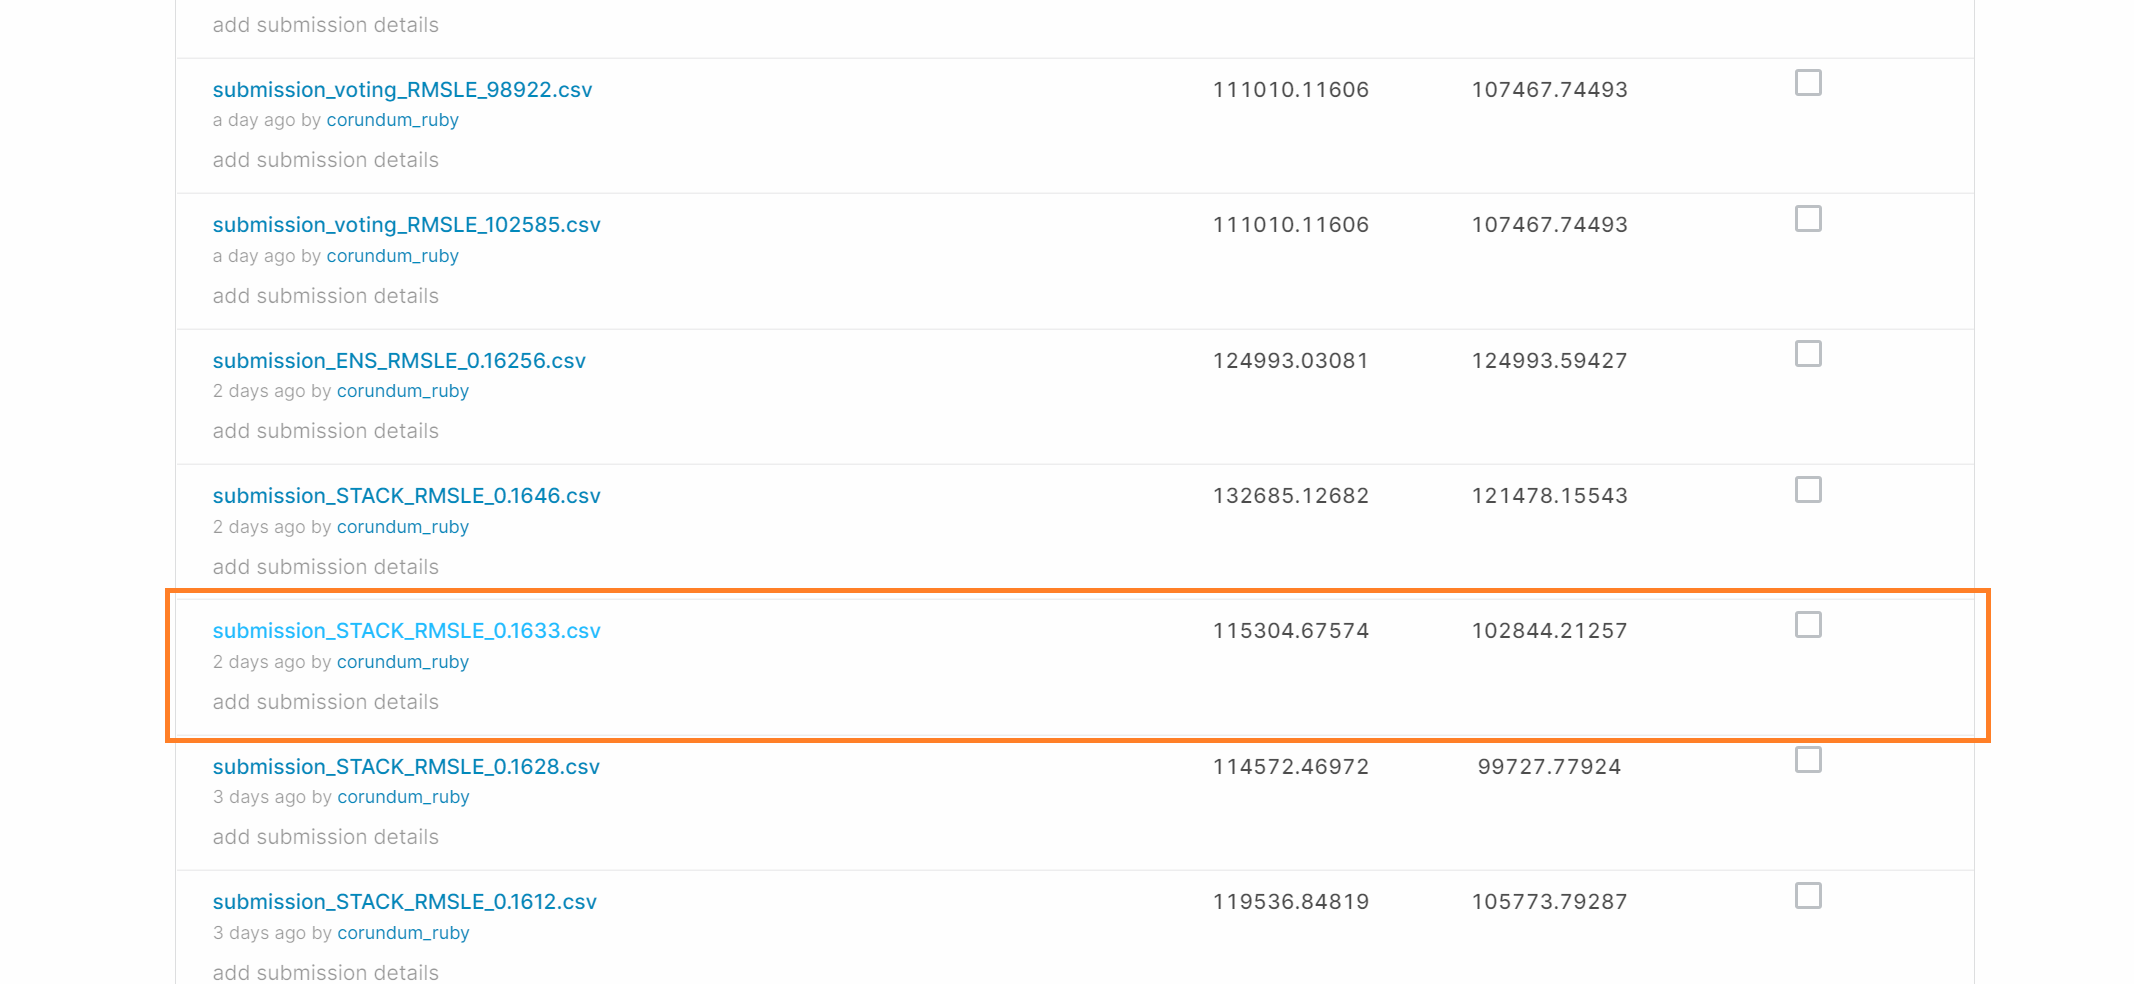

Private score 115304.67574 기록 했었던 흔적을 찾아 볼 수 있다.

### 5) 다섯번째 시도

다섯번째 시도라 하였으나, 여기서 크게 정리한 시도들은 상당히 많은 시행착오와

스코어 미달로 인한 패배감과 피로감이 많이 쌓여있는 상태였다.

이번에는 One-hot encoding 과 스케일링 기법,

그리고 세번째 시도에도 일부 기록이 남아있지만,

여러가지 가격에 영향을 미칠 것이라고 예상되는 피쳐들을 분류해서

컬럼에서는 찾아 볼 수 없는, 데이터들에서 숨겨진 의미들을 찾아서

그것들을 새로운 피쳐로 정의하고, 가격 영향 요소들을 좀 더 촘촘하게

서포트 하려는 의도를 반영했다.

기존에 pandasql 로 구현했던 부분들이 여기에도 많이 적용되었다.

세세한 구현은 다르지만 데이터셋의 조정 목표의 방향성을 고려하여

유사한 부분 위주로 정리를 하였다.

※ 해당부분은 피쳐 엔지니어링 등의 부분에서 출처를 표기 하고 있다.

In [769]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import xgboost as xgb
import lightgbm as lgb

## Scikit-Learn
from sklearn.model_selection import train_test_split    ## 학습／테스트 셋 분리
from sklearn.metrics import mean_squared_error          ## RMSE 점수를 계산하기 위함
from sklearn.model_selection import GridSearchCV        ## GridSearchCV
from sklearn.model_selection import KFold, cross_val_score  ## 220921 추가 cv_score 계산
from sklearn.preprocessing import StandardScaler    ## 220922 추가
from sklearn.preprocessing import RobustScaler      ## 220922 추가
from sklearn.cluster import KMeans                  ## 220922 추가 Cluster

## 모델
from xgboost import XGBRegressor            ## XGBoost GPU 가속(참고：https://bo-10000.tistory.com/124)
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import VotingRegressor        ## 220919 추가 - 앙상블, 투표 기법

# pip install mlxtend 
from mlxtend.regressor import StackingCVRegressor   ## 220920 추가 - 스태킹

## 데이터프레임 조작을 위해 추가
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


사전에 정의 해놓을 것들

In [770]:
# RMSE 점수를 계산하기 위함
def rmse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred, squared=False)

def mse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)

In [771]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:

        ## 모델의 이름 가져온다
        model_name = model.__class__.__name__
        
        ## 학습／테스트 데이터 분리 여기에서도 random_state를 고정
        X_train, X_test, y_train, y_test = \
            train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)         ## 모델 학습
        y_pred = model.predict(X_test)      ## 회귀 예측
        
        df[model_name] = rmse(y_test, y_pred)   ## 예측 결과 RMSE 값 저장

        ## dataframe 에 저장
        score_df = pd.DataFrame(df, index=["RMSE"]).T.sort_values("RMSE", ascending=False)
        
    return score_df

## get_scores(models, train, y)

In [772]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    
    # GridSearchCV 모델로 초기화
    grid_model = \
        GridSearchCV( \
            model, \
            param_grid=param_grid, \
            scoring="neg_mean_squared_error", \
            cv = 5, \
            verbose=verbose, \
            n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_["params"]
    score = grid_model.cv_results_["mean_test_score"]
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results["score"] = score
    
    # RMSLE 값 계산 후 정렬
    results["RMSLE"] = np.sqrt(-1 * results["score"])
    results = results.sort_values("RMSLE")

    return results


# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [5, 10, 20],
#     "learning_rate":[0.01, 0.1, 1]
# }
# my_GridSearch(lgb_model, train, y, param_grid, verbose=2, n_jobs=-1)

In [773]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    
    ## 모델을 `train`, `y`로 학습
    model.fit(train, y)

    ## `test`에 대해 예측        
    pred = model.predict(test)

    ## 예측값을 `np.expm1`으로 변환
    pred = np.expm1(pred)
    
    data_dir = "Data_Kaggle\\"
    submission_path = data_dir + "sample_submission.csv"
    
    ## submission 데이터 불러옴
    submission = pd.read_csv(submission_path)
    
    ## submission 템플릿 맞춤 - 에측 가격 반영
    submission["price"] = pred            
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'\
        .format(data_dir, model_name, rmsle)

    ## submission 파일 저장
    submission.to_csv(submission_csv_path, index=False)
    
    print('{} saved!'.format(submission_csv_path))



# model = stack_model.fit(X_train, y_train)
# pred = model.predict(test)
# pred = np.expm1(pred)

# save_submission(model, train, y, test, "STACK", rmsle="0.0000")

In [774]:
## random_state
random_state = 75

In [863]:
## 데이터 가져오기
# train = pd.read_csv("Data\\train.csv")
# test = pd.read_csv("Data\\test.csv")

## 데이터 가져오기 - 캐글 공식 파일엔 문제가 있다. test 파일은 교체
train = pd.read_csv("Data_Kaggle\\train.csv")
test = pd.read_csv("Data_kaggle\\test.csv")

## 사본
train_copy = train.copy()
test_copy = test.copy()

스코어 달성의 연이은 실패에 의해 데이터에 대한 의구심이 들어서

올바른 데이터셋인지 별도의 실험도 진행하였다.

그 결과 엄청난 스코어（70만점을 초과）도 확인 할 수 있었다.

In [664]:
## 기본적으로 하는 것 다시 반복.

## 일단 결측치는 없다.

이번에는 피쳐들을 낱낱이 쪼개버리고 사람이 못 알아 보더라도

컴퓨터에게 학습을 시키기 유리한 구조로 데이터 셋을 구성하는 것에 중점을 두었다.

EDA, Feature Engineering 등에 관해서는, 인용된 코드의 작성자 분과

새벽에도 여러가지 질문에 대답해주시고, 일부 통계학적 지식을 알려주신

구본회 교육생의 설명과 조언등의 도움을 받아서 정리해 적용할 수 있었다.

<AxesSubplot:>

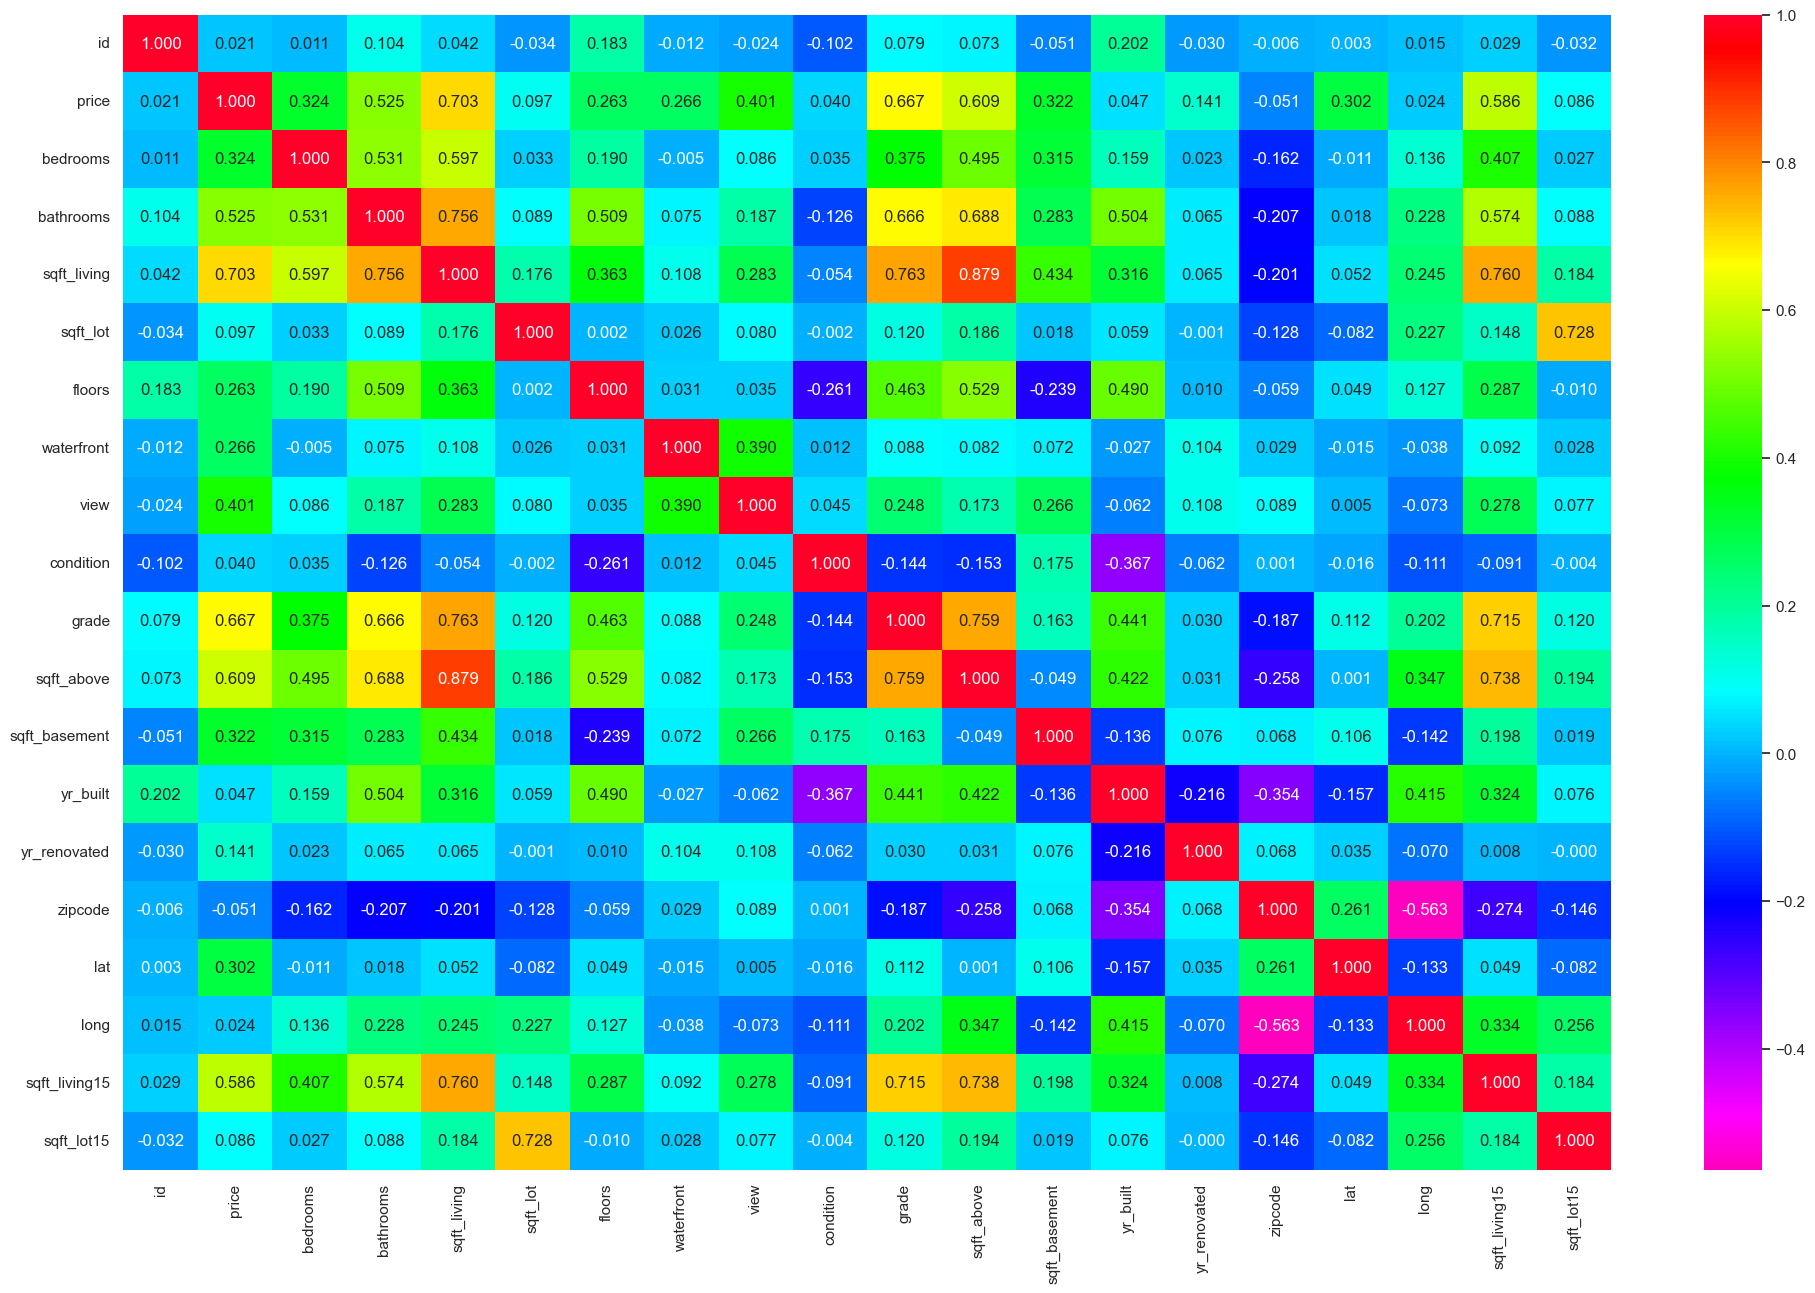

In [797]:

## 상관관계 구하는 함수 corr()
## 전반적인 상관관계를 먼저 확인해보자…
train_corr = train.corr()
plt.figure(figsize=(24,15))
sns.heatmap(train_corr, annot=True, fmt=".3f", cmap="gist_rainbow_r")


In [750]:
## 3번째 열이 price 임을 확인 할 수 있다.
## 차례로 행을 내려가면서 살펴보면
## sqft_living : 0.703
## grade : 0.667
## sqft_above :0.609
## sqft_living15 :0.586 
## bathrooms : 0.525
## 이정도가 비교적 높은 상관관계를 가진다고 볼 수 있겠다

이하의 자료들은 코드블럭 내에서도 출처를 명확히 밝혀두고 있다.

대부분의 피쳐들은 이미 다 시도해 봤던 내용들 이지만

대부분 적용 할 때마다 지속적으로 스코어가 멀어져서 지금은 남아있지 않다.

이번 시도에서는 진짜 점수가 얼마가 나오던간에

거의 대부분의 피쳐들을 대상으로 쪼개고 새로 만드는 작업등을 적용한다.

특히 세번째 시도에서 적용했던 동네 근처지역등의 평당가격을 지표소 만들었던

여러가지 새로운 컬럼들을 대부분 여기에서 정리하여 구현하였다.

다른부분은 이전에 적용했었던 내용을 다시 정리하였다.

시간관련 피쳐 생성 부분은 전체적으로 참고했으며,

이전에 pandasql 등을 사용하여 코드를 전개했던 부분을, 

블럭 전체적인 코드 형태와 유사하게 다시 정리하여 구현하였다.

lat long 컬럼은, zipcode 로 대체가능하다 생각했었기에 여기서도 제외시켰다.

In [864]:
## 220922 추가
## reference : https://www.kaggle.com/code/harangdev/kakr-2nd-competition-101795-solution/notebook
##
## Feature Engineering 부분 sql로 정의 하며 진행했던 부분을 
## 참고자료의 짧은 코드들로 대체, 피쳐 추가
##

## train, test 데이터의 인덱스 저장
tr_idx = train.index.tolist()
te_idx = test.index.tolist()

## train, test 데이터 병합
df = pd.concat([train.copy(), test.copy()])

## target 으로 사용하는 걸 price 가 아니라 평당가를 새로운 지표로 사용
## 거주면적의 차이를 고려한 평당가격으로 비교를 해야
## 가격만으로 비교하는 것 보다 실제 부동산의 가치에 근접한 평가가 가능
df["price_per_living"] = np.log1p(df["price"] / df["sqft_living"])
df = df.drop('price', axis=1)   ## price 열 삭제


## 아래는 부동산의 가치를 평가하기 위한 지표들을 더 촘촘하게 배치하기 위함

## 실(room)의 수 - 방＋화장실
df["room_count"] = df["bedrooms"] + df["bathrooms"]

## 피쳐 01：주거면적 / 실(room)의 수 (+1은 나누기 오류 방지)
df["sqft_living_per_rooms"] = df["sqft_living"] / (df["room_count"]+1)
## 피쳐 02：대지면적 / 실(room)의 수 (+1은 나누기 오류 방지)
df["sqft_lot_per_rooms"] = df["sqft_lot"] / (df["room_count"]+1)
## 피쳐 03：층당 실(room)의 수
df["room_per_floors"] = df["room_count"] / df["floors"]
## 피쳐 04：주거 면적을 층으로 나눔 → 층당 주거 면적
df["sqft_living_per_floors"] = df["sqft_living"] / df["floors"]
## 피쳐 05：대지 면적을 층으로 나눔 → 층당 대지 면적
df["sqft_lot_per_floors"] = df["sqft_lot"] / df["floors"]
## 피쳐 06：주거 면적을 침실 수로 나눔 → 방의 크기를 유추 해 볼 수 있다
df["sqft_living_per_bedrooms"] = df["sqft_living"] / (df["bedrooms"]+1)
## 피쳐 07：대지 면적을 침실 수로 나눔 → 땅의 크기를 유추 해 볼 수 있다
df["sqft_lot_per_bedrooms"] = df["sqft_lot"] / (df["bedrooms"]+1)
## 피쳐 08：층당 침실의 수 → 몇명 가족이 살 수 있는지 유추 해 볼 수 있다
df["bedroom_per_floors"] = df["bedrooms"] / df["floors"]

## 피쳐 09：대지면적에서 주거면적을 빼면 - 마당이나 주차공간같은 그런 공간
df["sqft_lot-D-sqft_living"] = df["sqft_lot"] - df["sqft_living"]
## 피쳐 10：주거면적 대비 땅의 크기 - 건폐율 비슷한 계산
df["sqft_lot-R-sqft_living"] = df["sqft_lot"] / df["sqft_living"]

## 피쳐 11：이웃집들 평균 주거면적 대비, 이 집의 주거면적 - 주변집 대비 상대적으로 집의 크기 유추
df["sqft_living15-D-sqft_living"] = df["sqft_living15"] - df["sqft_living"]
## 피쳐 12：이웃집들 평균 주거면적 대비, 이 집의 주거면적 - 주변집 대비 상대적으로 집의 크기 비율 유추
df["sqft_living15-R-sqft_living"] = df["sqft_living15"] / df["sqft_living"]
## 피쳐 13：이웃집들 평균 대지면적 대비, 이 집의 대지면적 - 주변집 대비 상대적으로 땅의 크기 유추
df["sqft_lot15-D-sqft_lot"] = df["sqft_lot15"] - df["sqft_lot"]
## 피쳐 14：이웃집들 평균 대지면적 대비, 이 집의 대지면적 - 주변집 대비 상대적으로 땅의 크기 비율 유추
df["sqft_lot15-R-sqft_lot"] = df["sqft_lot15"] / df["sqft_lot"]

## 피쳐 15：침실과 욕실의 곱
df["rooms_mul"] = df["bedrooms"] * df["bathrooms"]

## 피쳐 16：종합평가점수 → 상태, 등급, 뷰
df["total_score"] = df["condition"] + df["grade"] + df["view"]

## 피쳐 17：다락방의 유무：층이 정수층이 아닌 경우 
df["has_attic"] = ((df["floors"] % 1) != 0).astype("uint8")


## ───────────────────────────────────────────
## 여기서부터는 시간 관련한 부분
## ───────────────────────────────────────────

## 임의의 날짜 지정
today = pd.to_datetime('2016-01-01')

## 리모델링 여부
df['was_renovated'] = (df['yr_renovated'] != 0).astype('uint8')

## 리모델링 하지 않은 인덱스의 yr_renovated 값은 0 인데 여기에 yr_built 값을 반영
not_renovated = df[df['was_renovated'] == 0].index
df.loc[not_renovated, 'yr_renovated'] = df.loc[not_renovated, 'yr_built']

## 날짜(시간) 관련 부분 datetime 타입으로 새로 적용
df['date'] = pd.to_datetime(df['date'].str[:8])
df['yr_built'] = pd.to_datetime({'year': df['yr_built'], 'month': [1]*len(df), 'day': [1]*len(df)})
df['yr_renovated'] = pd.to_datetime({'year': df['yr_renovated'], 'month': [1]*len(df), 'day': [1]*len(df)}, errors='coerce')

## 날짜 관련 피쳐. 대부분 주택의 노후도와 관련이 있다.
df['today-D-date'] = (today - df['date']).dt.days                       
df['today-D-yr_renovated'] = (today - df['yr_renovated']).dt.days       
df['today-D-yr_built'] = (today - df['yr_built']).dt.days
df['date-D-yr_built'] = (df['date'] - df['yr_built']).dt.days
df['yr_renovated-D-yr_built'] = (df['yr_renovated'] - df['yr_built']).dt.days
df = df.drop(['date', 'yr_built', 'yr_renovated'], axis=1)


## lat, long 부분은 평가에 어느정도 영향을 끼칠지 모르겠지만
## 나는 사용하지 않으려고 한다.
## 위치(지역)등을 클러스터링(군집화) 하는 과정에 있어서
## zipcode 라는 더 좋은 피쳐가 있는데 이게 큰 의미가 있을까…

## 우편번호를 자릿수 단위로 정리
df["zipcode"] = df["zipcode"].astype("str")
df["zipcode-3"] = df["zipcode"].str[2:3]
df["zipcode-4"] = df["zipcode"].str[3:4]
df["zipcode-5"] = df["zipcode"].str[4:5]
df["zipcode-34"] = df["zipcode"].str[2:4]
df["zipcode-45"] = df["zipcode"].str[3:5]
df["zipcode-35"] = df["zipcode"].str[2:3] + df["zipcode"].str[4:5]

## 우편번호당 평당가격을 적용
cols =  ["zipcode"]
for col in cols:
    val_count = df[col].value_counts()
    agg_cols = ["price_per_living"]
    temp = df.groupby(col)[agg_cols].agg("mean").rename({k: str(col)+"_mean_"+str(k) for k in agg_cols}, axis=1)
    df = df.merge(temp, how="left", on=col)

## 원핫인코딩
df = pd.get_dummies(df)

## ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
## log1p：정규분표 모양이 아니라,
## 왼쪽이나 오른쪽으로 쏠려서 높은 수치로 몰려있을때
##  왜도（skewness） 첨도（kurtosis）가 보일때
## ※ 참고 웹사이트：[왜도 (skewness) 첨도 (kurtosis)](https://m.blog.naver.com/yk60park/22210075857)
## ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
## 정규화
## 그냥 전반적으로 씌워주면 좋다.
## ※ 참고 웹사이트：[［Sklearn］ 파이썬 정규화 Scaler 종류 : Standard, MinMax, Robust](https://jimmy-ai.tistory.com/139)
## ※ 참고 웹사이트：[정규화 정리1 - Scaling, Regularization, Standardization](https://blog.nerdfactory.ai/2021/06/15/Normalization-Theorem-1.htm)
## ※ 참고 웹사이트：[［ML］ 데이터 스케일링(Data Scaling) 이란](https://wooono.tistory.com/96)
## ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

## 면적 관련 피쳐 - sqft로 시작하는, 해당하는 컬럼들을 skewness 에 모아 담는다
skewness = pd.Series()
for col in [col for col in df.columns if col.startswith("sqft")]:
    if (df[col]<0).sum() == 0:
        skewness.loc[col] = df[col].skew()
skew_col = skewness[skewness>1].index.tolist()

## 정규분포
df[skew_col] = np.log1p(df[skew_col])

## price_per_living 은 target 로 사용할 것이라 제외. (price 사용하지 않음)
feats = [col for col in df.columns if col != "price_per_living"]

## 스케일링
df[feats] = StandardScaler().fit_transform(df[feats])


## 이하 코드는 오류남
# x_data = df.loc[tr_idx, feats]
# y_data = df.loc['price_per_living']
# test = df.loc[te_idx, feats]

코드 3/4 정도의 지점 부근에 StandardScaler 사용에 관하여

정규분포, 정규화 관련 부분을 구본회 교육생에게 설명을 들을 수 있었다.

용어와 자료들을 따로 더 찾아서 공부하고, 그때에 참고한 웹사이트를 기록했다.

피쳐 뿐 아니라, 스케일링도 전반적으로 적용 하고,

주택의 가격에 영향을 끼치는 요소들도 높은 밀도로 가격 예측을 보조할 수 있도록

많은 조정을 거쳤기에 기대가 많이 됐다.

In [865]:

## 데이터셋 정리
train_copy = df.loc[tr_idx, feats]
y = df["price_per_living"].dropna()
test_copy = df.loc[te_idx, feats]

In [866]:
print(train_copy.shape)
print(test_copy.shape)

(15035, 229)
(6468, 229)


In [867]:
## id 컬럼 제거
train_copy = train_copy.drop(columns="id", errors="ignore")
test_copy = test_copy.drop(columns="id", errors="ignore")

<AxesSubplot:>

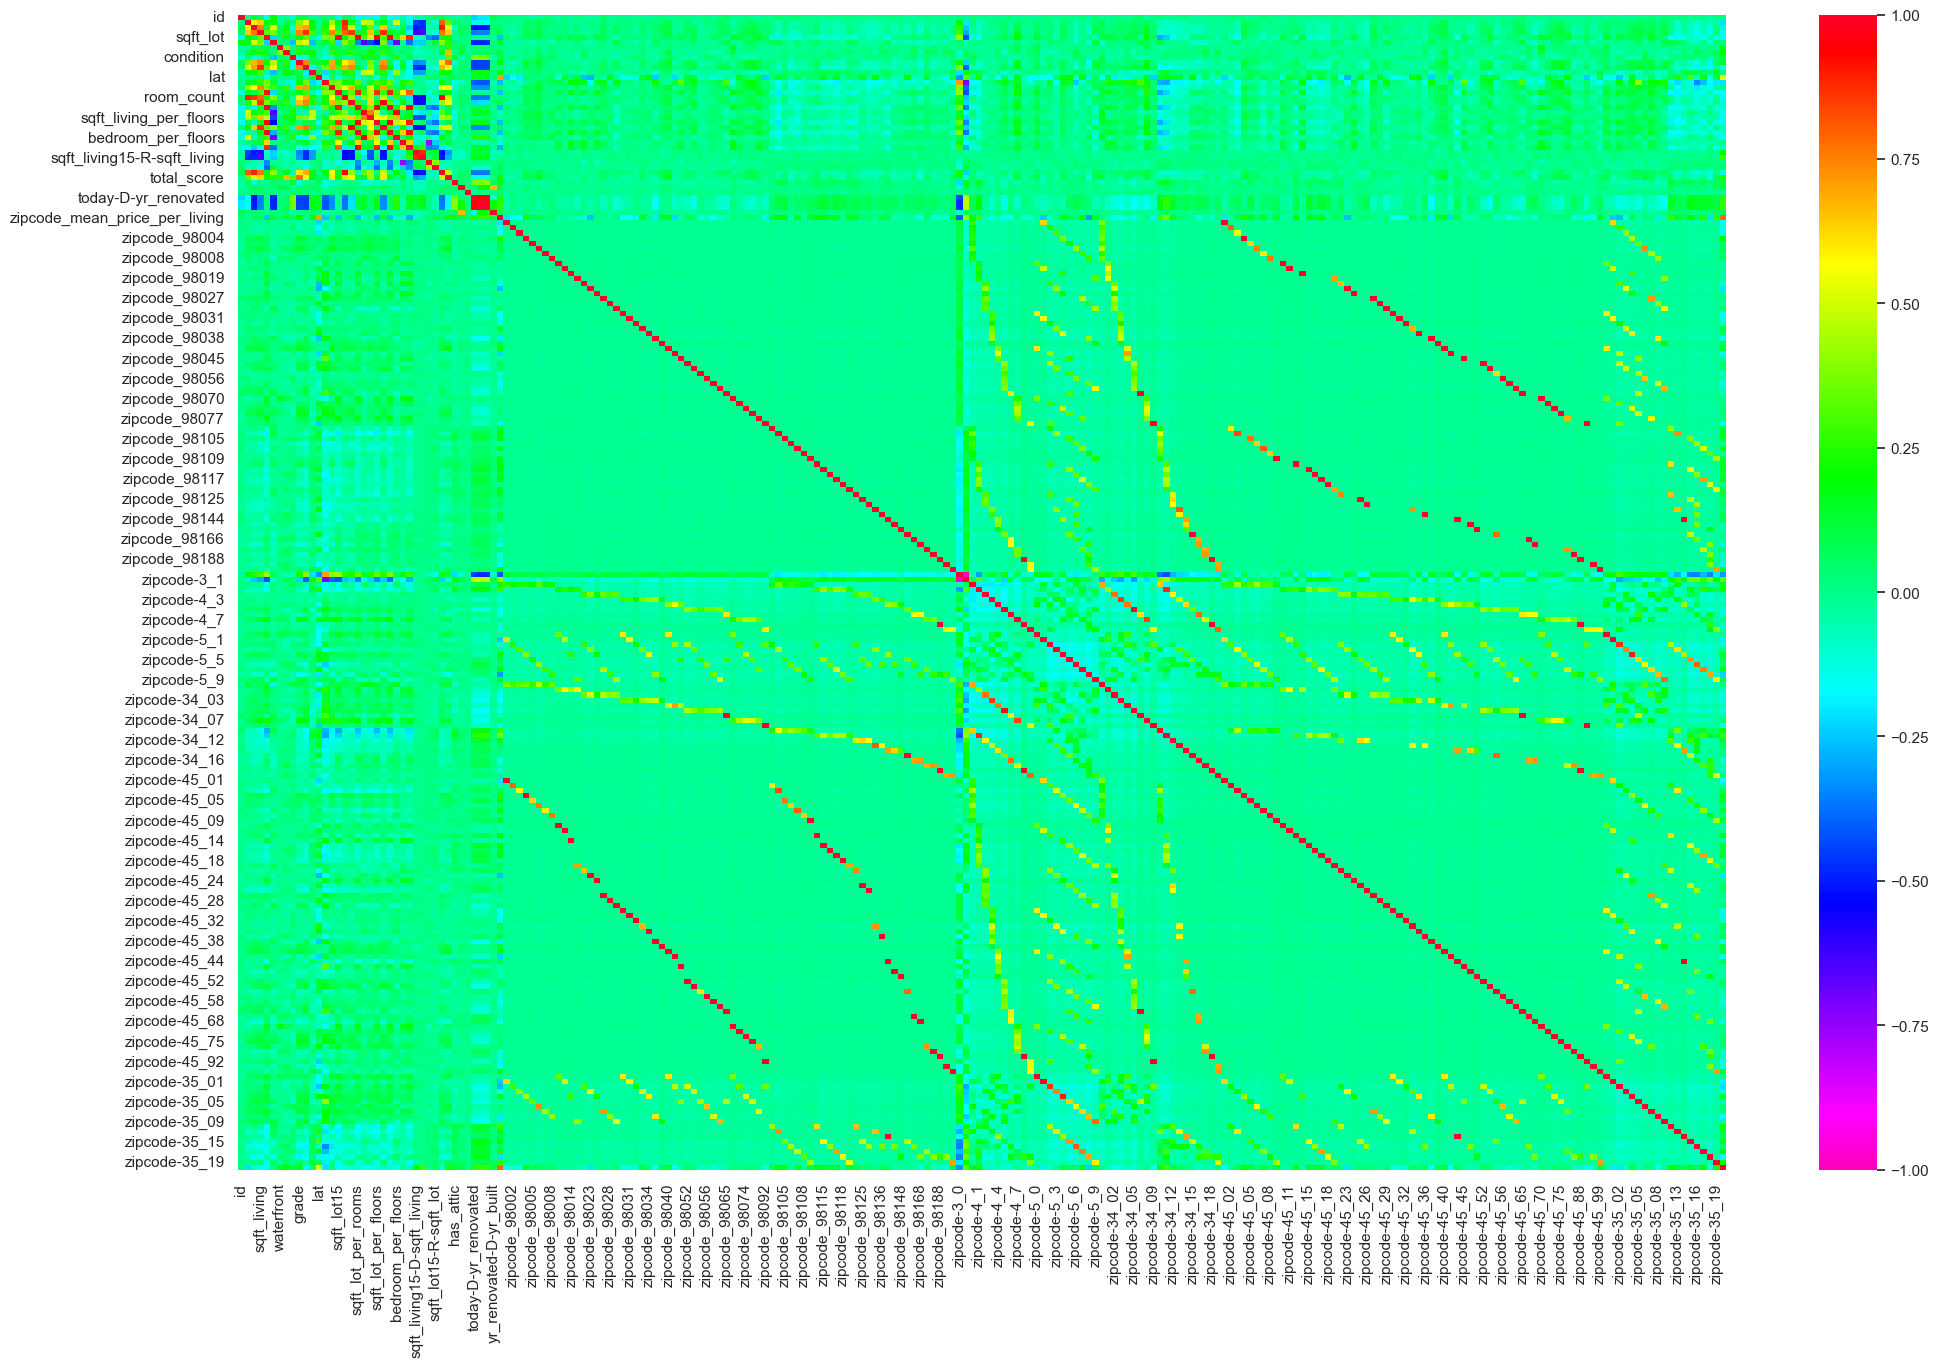

In [868]:
## Feature Engineering 마치고 상관계수를 확인해 보자.
## 히트맵에서 색상이 달궈진 정도를 보면 그간의 작업이 효과적인지 확인이 가능하다.
train_corr = df.loc[tr_idx, feats]
train_corr["price_per_living"] = df["price_per_living"].dropna()
plt.figure(figsize=(24,15))
sns.heatmap(train_corr.corr(), cmap="gist_rainbow_r")

In [869]:
random_state = 75 # 다른 모델들도 동일한 random_state 가지도록 지정

gb_model = GradientBoostingRegressor(random_state=random_state)
xgb_model = XGBRegressor(random_state=random_state)
lgb_model = LGBMRegressor(random_state=random_state)
rf_model = RandomForestRegressor(random_state=random_state)

models = [gb_model, xgb_model, lgb_model, rf_model]  ## 모델들의 인스턴스들

In [870]:
get_scores(models, train_copy, y)

,RMSE
GradientBoostingRegressor,0.175601
RandomForestRegressor,0.173271
XGBRegressor,0.167395
LGBMRegressor,0.164552


In [825]:
param_grid = {
    'n_estimators': [500, 900],
    'max_depth': [5, 9],
    "learning_rate":[0.5, 0.05]
}

my_GridSearch(XGBRegressor(random_state=random_state), train_copy, y, param_grid, verbose=2, n_jobs=-1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
5,0.05,5,900,-0.025279,0.158994
4,0.05,5,500,-0.025737,0.160428
6,0.05,9,500,-0.026045,0.161385
7,0.05,9,900,-0.026059,0.161429
0,0.50,5,500,-0.032779,0.181049
1,0.50,5,900,-0.032988,0.181627
2,0.50,9,500,-0.034100,0.184661
3,0.50,9,900,-0.034100,0.184661


In [871]:
param_grid = {
    'n_estimators': [700, 1100],
    'max_depth': [5, 7, 11],
    "learning_rate":[0.5, 0.05]
}

my_GridSearch(LGBMRegressor(random_state=random_state), train_copy, y, param_grid, verbose=2, n_jobs=-1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
6,0.05,5,700,-0.025549,0.159839
7,0.05,5,1100,-0.025582,0.159942
8,0.05,7,700,-0.025608,0.160024
9,0.05,7,1100,-0.025670,0.160219
10,0.05,11,700,-0.025744,0.160450
11,0.05,11,1100,-0.025848,0.160774
0,0.50,5,700,-0.032926,0.181454
1,0.50,5,1100,-0.033280,0.182427
2,0.50,7,700,-0.033931,0.184203
3,0.50,7,1100,-0.033971,0.184313


하이퍼 파라메터 적합 후보들을 찾아보았다.

In [872]:
## 괜찮은 파라메터를 사용해서 다시 모델 선택
xgb_model = XGBRegressor(max_depth = 5, n_estimators = 900, learning_rate = 0.05, random_state=random_state, n_jobs = -1)
lgb_model = LGBMRegressor(max_depth = 5, n_estimators = 700, learning_rate = 0.05, random_state=random_state, n_jobs = -1)


In [873]:
## 기존에 사용하던 save_submission 함수 사용 불가능
## 여기에서 기능 변경해서 사용


model = lgb_model       ## 모델 선택
model_name = "LGBM"     ## 파일명 구성요소 - 모델 이름 입력
rmsle = "0.159839"      ## 파일명 구성요소 - RMSLE 값


## 모델을 `train`, `y`로 학습
model.fit(train_copy, np.expm1(y))

## `test`에 대해 예측
pred = model.predict(test_copy)

## 예측값을 `np.expm1`으로 변환하면
## price_per_living 값의 형식에 맞춰진다.
## 따라서 그 값에 주거면적만큼을 곱해주면 예측 가격이 나온다.
pred = pred * test["sqft_living"]

data_dir = "Data_Kaggle\\"
submission_path = data_dir + "sample_submission.csv"

## submission 데이터 불러옴
submission = pd.read_csv(submission_path)

## submission 템플릿 맞춤 - 에측 가격 반영
submission["price"] = pred
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'\
    .format(data_dir, model_name, rmsle)

## submission 파일 저장
submission.to_csv(submission_csv_path, index=False)

print('{} saved!'.format(submission_csv_path))


Data_Kaggle\/submission_LGBM_RMSLE_0.159839.csv saved!


하지만 이 시도도 스코어 기준에 상당히 많이 멀어진 결과를 확인 할 수 있었고.

여러번 시도를 해 보았으나 대부분 기대이하의 스코어를 기록하였다.

### 6) 여섯번째 시도

여섯번째 시도는 하이퍼파라미터 튜닝과 어느정도의 스코어에 근접해졌을때

앙상블 기법으로 어느정도 스코어를 단축 시킬 수 있다는 생각이

많은 실험으로 인해 거의 확신이 되어있던 상황이다.

1회 실험에 소요시간이 적게 걸리며, 시간대비 학습 결과를 확인 했을 때

LGBMRegressor 모델등을 통하여 약 11만5천 내외의 스코어를 목표로 하고,

그 상황에서 앙상블 기법을 활용하여 루브릭 기준의 스코어에 도달하려는 목적만이 남았다.

여러 시도들을 통해 해 볼만한 것은 거의 다 해봤다.

이젠 진짜 스코어 달성 뿐이 남았다.

이 자료는 baseline 캐글노드를 기본으로, 앙상블 기법을 적용한 사례로

최종적으로 스코어링을 달성하였다고 한 자료이다.

대부분은 이전에 참고했던 자료들을 토대로 작성된 내용으로 보인다.

다양한 코드들에서 장점을 골라서 만든 코드로, 실제로 스코어 달성 가능성이 높다고 판단했다.

약간의 튜닝으로 원하는 1차 스코어에 근접할 수 있을거라는 생각이 들었고,

실제로 어느정도 가까이에 접근할 수 있었다.


※ 참고 Notebook：[https://github.com/ceuity/AIFFEL/blob/main/exploration_09/%5BE-09%5Dkaggle_kakr_housing.ipynb](https://github.com/ceuity/AIFFEL/blob/main/exploration_09/%5BE-09%5Dkaggle_kakr_housing.ipynb)

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import xgboost as xgb
import lightgbm as lgb

## Scikit-Learn
from sklearn.model_selection import train_test_split    ## 학습／테스트 셋 분리
from sklearn.metrics import mean_squared_error          ## RMSE 점수를 계산하기 위함
from sklearn.model_selection import GridSearchCV        ## GridSearchCV
from sklearn.model_selection import KFold, cross_val_score  ## 220921 추가 cv_score 계산
from sklearn.preprocessing import StandardScaler    ## 220922 추가
from sklearn.preprocessing import RobustScaler      ## 220922 추가
from sklearn.cluster import KMeans                  ## 220922 추가 Cluster

## 모델
from xgboost import XGBRegressor            ## XGBoost GPU 가속(https://bo-10000.tistory.com/124)
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import VotingRegressor        ## 220919 추가 - 앙상블, 투표 기법

from scipy.special import boxcox1p
from scipy.stats import norm
from scipy import stats

import gc
from xgboost import plot_importance

# pip install mlxtend 
from mlxtend.regressor import StackingCVRegressor   ## 220920 추가 - 스태킹

## 데이터프레임 조작을 위해 추가
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [3]:
# RMSE 점수를 계산하기 위함
def rmse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred, squared=False)

def mse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)

In [4]:
data_dir = 'Data_Kaggle'
train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [5]:
# data 전처리
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [6]:
train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

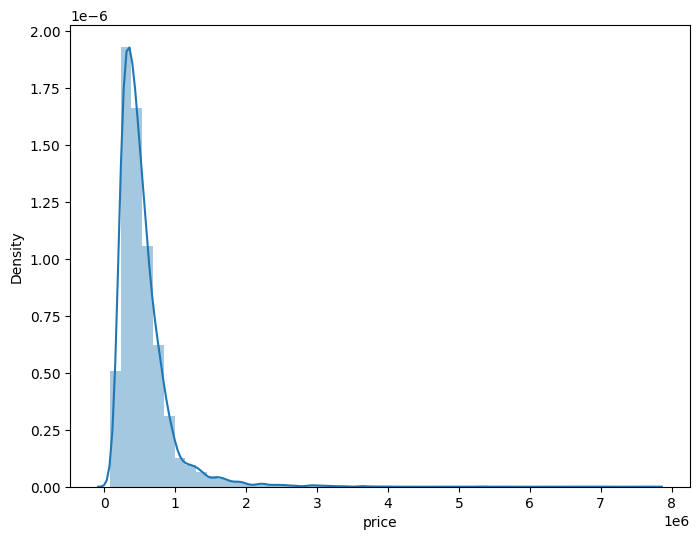

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['price'])

target인 price가 정규분포를 따르지 않고, 분산이 매우 크기 때문에

Normailize를 통해 price가 정규 분포를 가지도록 만들어준다.

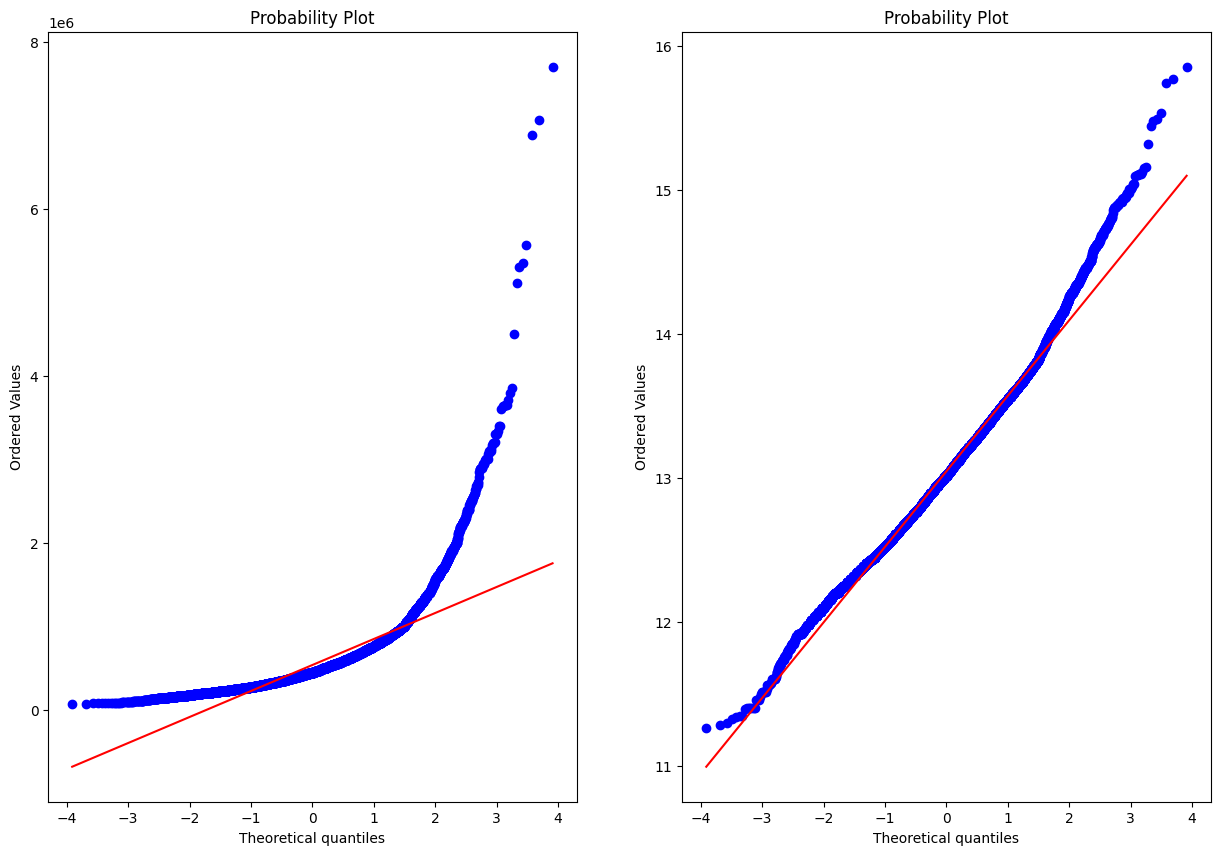

In [8]:
fig = plt.figure(figsize=(15, 10))

fig.add_subplot(1, 2, 1)
res = stats.probplot(train['price'], plot=plt)

fig.add_subplot(1, 2, 2)
res = stats.probplot(np.log1p(train['price']), plot=plt)

In [9]:
train['price'] = np.log1p(train['price'])

스피어만 순위 상관관계는 범주형 변수가 포함되어 있을 때, 

목적변수와 가장 상관관계가 높은 순서대로 정렬해주는 식이다.

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


<AxesSubplot:>

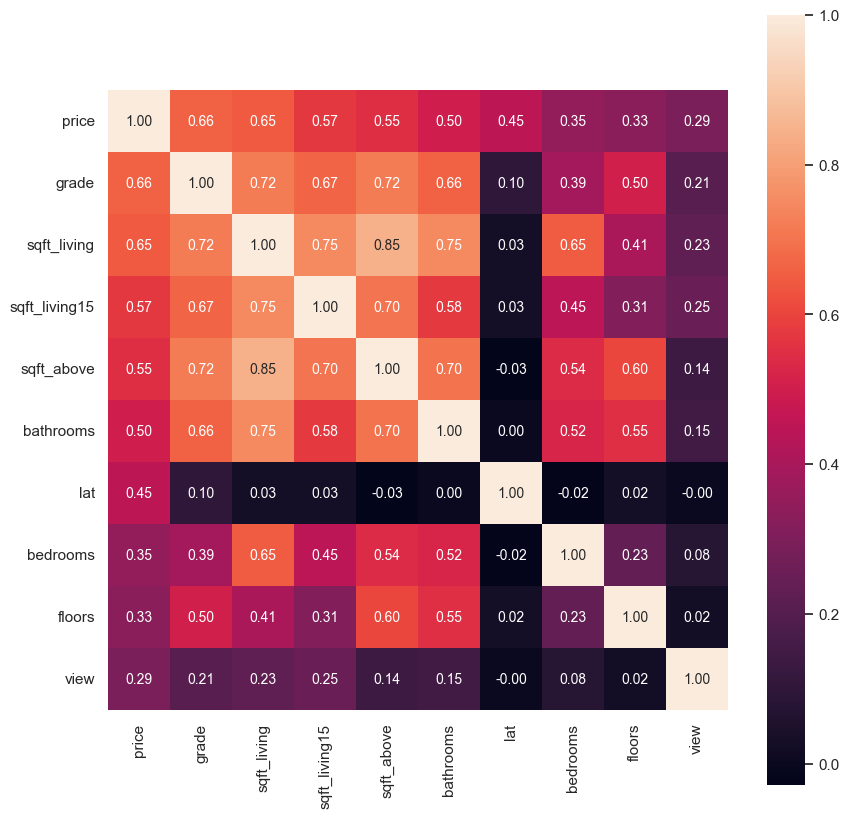

In [10]:
# correlation이 높은 상위 10개의 heatmap
# continuous + sequential variables --> spearman
# abs는 반비례관계도 고려하기 위함
import scipy as sp

cor_abs = abs(train.corr(method='spearman')) 

# price과 correlation이 높은 column 10개 뽑기(내림차순)
cor_cols = cor_abs.nlargest(n=10, columns='price').index 

# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(cor, fmt='.2f', annot=True, square=True, annot_kws={'size' : 10}, \
    xticklabels=cor_cols.values, yticklabels=cor_cols.values)

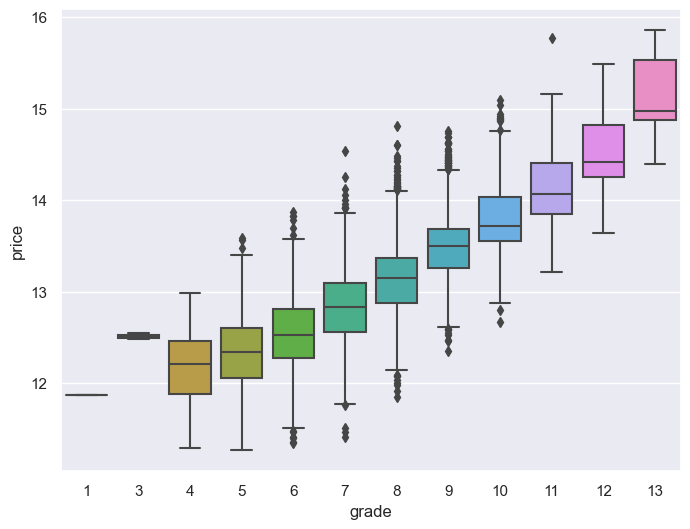

In [11]:
data = pd.concat([train['price'], train['grade']], axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y='price', data=data)

boxplot 데이터를 보고 이상치로 추정되는 데이터는 확인 후 제거 여부를 판단한다

- 등급 3의 값이 큰 이유
- 등급 7, 8, 9에서 이상치가 많은 이유
- 등급 8과 11에서 큰 이상치가 나타나는 이유

In [12]:
train.loc[(train['price'] > 12) & (train['grade'] == 3)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,201502,12.476104,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,4123,201411,12.542548,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


In [13]:
train.loc[(train['price'] > 14.7) & (train['grade'] == 8)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7173,7173,201408,14.808763,5,4.0,4230,27295,2.0,1,4,...,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295


In [14]:
train.loc[(train['price'] > 15.5) & (train['grade'] == 11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,201406,15.77031,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449


2302, 4123, 2775만 이상치라고 생각되므로 제거한다.



In [15]:
train = train.loc[train['id'] != 2302]
train = train.loc[train['id'] != 4123]
train = train.loc[train['id'] != 2775]

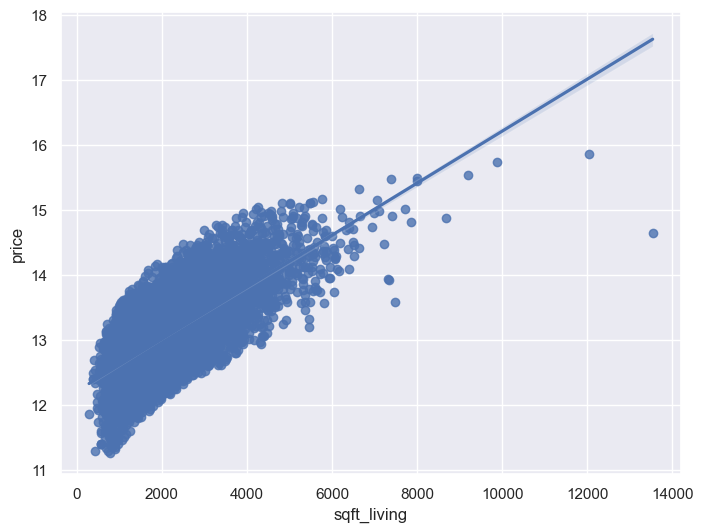

In [16]:
data = pd.concat([train['price'], train['sqft_living']], axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y='price', data=data)


sqft_living은 실제 사용 면적으로 볼 수 있다. 

전반적으로 선형성을 보이나 이상치를 보이는 데이터는 확인 후 제거 여부를 판단한다.

In [17]:
train.loc[train['sqft_living'] > 13000]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8912,8912,201405,14.639686,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


다른 값들과 비교해봤을 때 크게 의미는 없어보이므로 제거한다.

In [18]:
train = train.loc[train['id'] != 8912]

In [19]:
# 정규화
skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    train[c] = np.log1p(train[c].values) # 각 요소에 대해 자연로그 log(1 + x)를 반환
    test[c] = np.log1p(test[c].values)

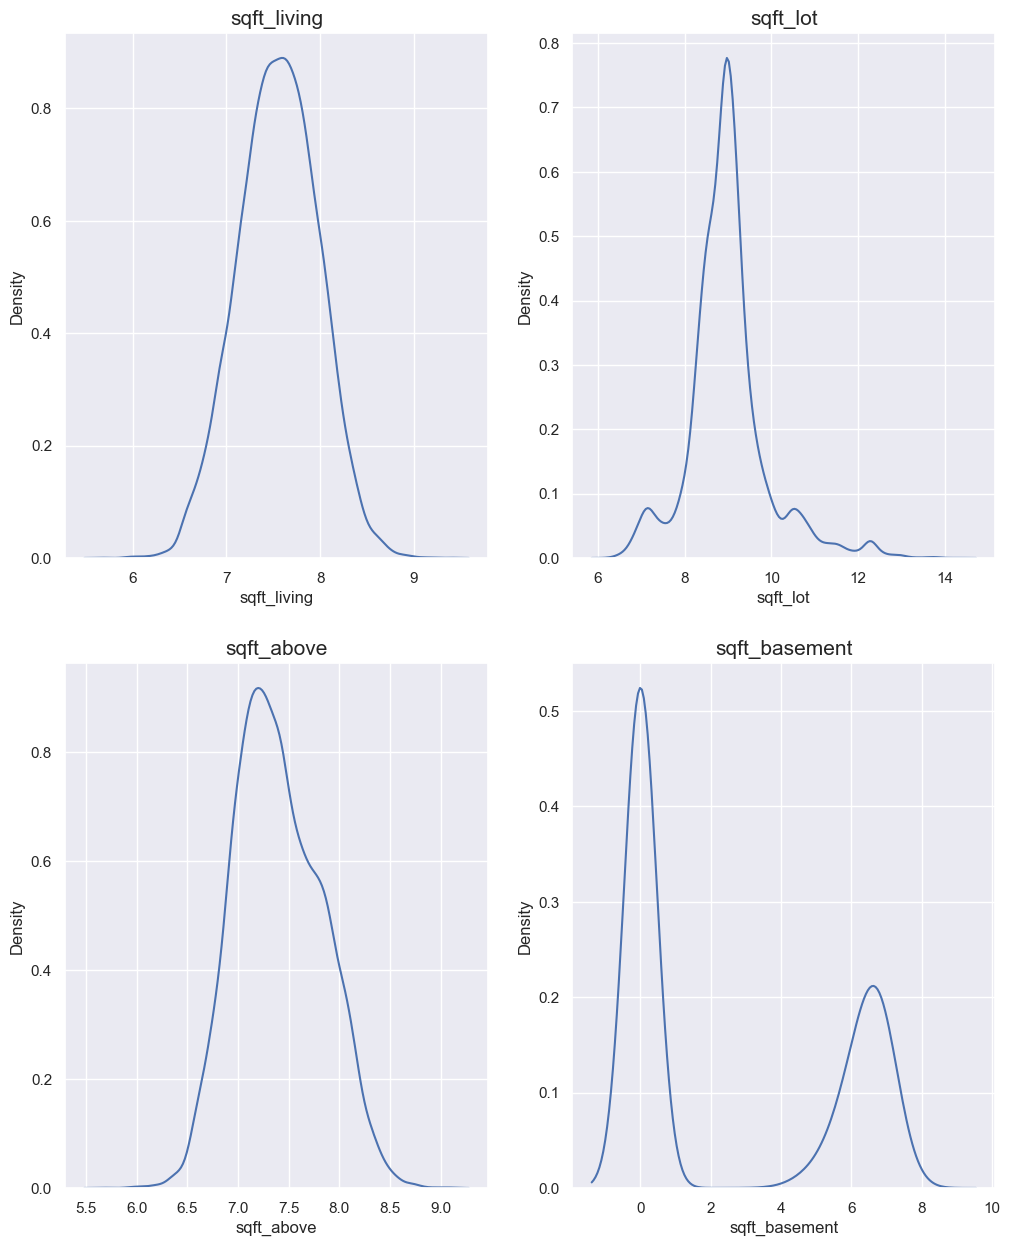

In [20]:
# 변환 후 분포 확인
fig, ax = plt.subplots(2, 2, figsize=(12, 15))

count = 0
for row in range(2):
    for col in range(2):
        if count == 4:
            break
        sns.kdeplot(train[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

In [21]:
# 변수 수정
for df in [train, test]:
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [22]:
# 변수 생성
for df in [train, test]:
    # 방의 전체 갯수
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    
    # 거실의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']
    df['sqft_total_size'] = df['sqft_above'] + df['sqft_basement']
    
    # 면적 대비 거실의 비율
    df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']
    df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_lot15']
    
    # 재건축 여부
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [23]:
# sqft당 가격 정보 변수 생성
train['per_price'] = train['price'] / train['sqft_total_size']
zipcode_price = train.groupby(['zipcode'])['per_price'].agg({'mean','var'}).reset_index()
train = pd.merge(train,zipcode_price,how='left',on='zipcode')
test = pd.merge(test,zipcode_price,how='left',on='zipcode')

In [24]:
# zipcode에 따른 가격정보인 zip_level 변수 생성
a = train[['zipcode', 'price']].groupby('zipcode').mean()
label = [j+1 for j in range(27)]
a['zip_level'] = pd.cut(a.price, bins=27, labels=label)
a = a.drop(['price'], axis=1)

train = train.merge(a, on='zipcode', how='left')
test = test.merge(a, on='zipcode', how='left')
train.zip_level = train.zip_level.astype(int)
test.zip_level = test.zip_level.astype(int)

0.7270369442618507


<AxesSubplot:xlabel='zip_level', ylabel='price'>

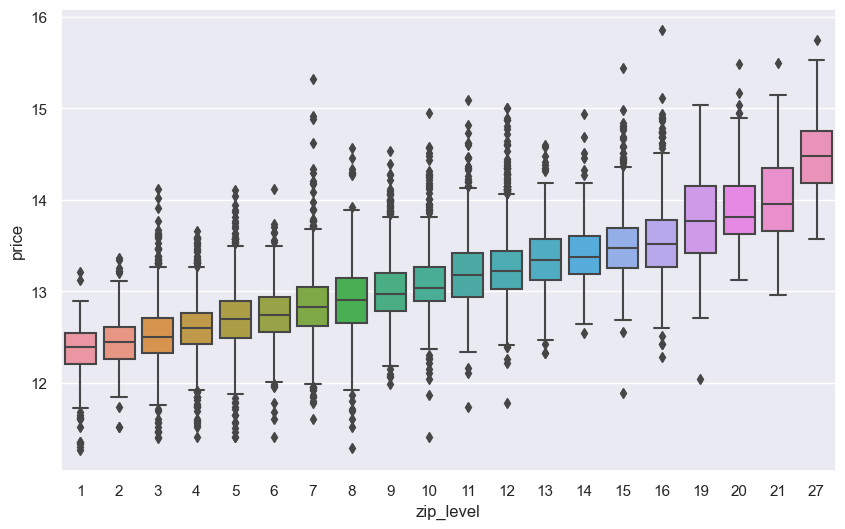

In [25]:
print(train.price.corr(train.zip_level))
fig = plt.figure(figsize=(10, 6))
sns.boxplot(train.zip_level, train.price)

In [26]:
# zip_mean_price를 Kmeans로 분류한 변수 생성
train['coord_cluster'] = None
test['coord_cluster'] = None

for i in train.zipcode.unique():
    df = train.loc[train.zipcode == i]
    coord = df[['lat','long']]
    num = (np.ceil(len(df) / 15)).astype(int)
    kmeans = KMeans(n_clusters=num, random_state=125).fit(coord)
    coord_cluster = kmeans.predict(coord)
    df['coord_cluster'] = coord_cluster
    df['coord_cluster'] = df['coord_cluster'].map(lambda x: 'c_' + str(x).rjust(2, '0'))
    train.loc[df.index, 'coord_cluster'] = df['coord_cluster']

    t_df = test.loc[test.zipcode == i]
    t_coord = t_df[['lat','long']]
    coord_cluster = kmeans.predict(t_coord)
    t_df['coord_cluster'] = coord_cluster
    t_df['coord_cluster'] = t_df['coord_cluster'].map(lambda x: 'c_' + str(x).rjust(2, '0'))
    test.loc[t_df.index, 'coord_cluster'] = t_df['coord_cluster']

train['test'] = train['zipcode'].astype(str) + train['coord_cluster']
test['test'] = test['zipcode'].astype(str) + test['coord_cluster']
k = train[['price','test']].groupby('test').mean()
k = k.rename(columns={'price' : 'mean_price'})

train = pd.merge(train, k, how='left', on='test')
test = pd.merge(test, k, how='left', on='test')
train = train.rename(columns={'price_x' : 'price', 'price_y' : 'mean_price'})

train = train.drop(['coord_cluster', 'test'], axis=1)
test = test.drop(['coord_cluster', 'test'], axis=1)

0.8354618763641883


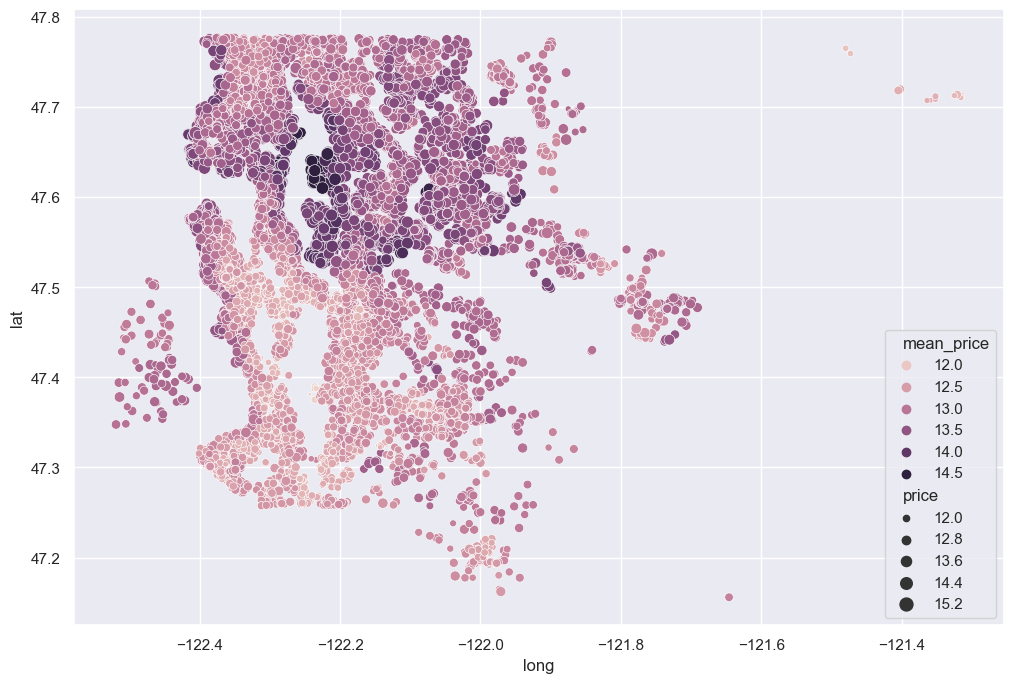

In [27]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='mean_price',size='price',sizes=(5,100), data=train)
print(train.price.corr(train.mean_price))

In [28]:
# grade + condition + view 를 합친 새로운 변수 생성
train['new_grade'] = train['grade'] + train['condition'] + train['view']
test['new_grade'] = test['grade'] + test['condition'] + test['view']

In [29]:
for df in [train, test]:
    df['zipcode_mean'] = df['mean'] * df['sqft_total_size']
    df['zipcode_var'] = df['var'] * df['sqft_total_size']
    del df['mean']; del df['var']

In [30]:
# target 분리
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_ratio_1', 'sqft_ratio15', 'is_renovated',
       'per_price', 'zip_level', 'mean_price', 'new_grade', 'zipcode_mean',
       'zipcode_var'],
      dtype='object')


In [31]:
# id 컬럼 삭제
sub_id = train['id']
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_ratio_1', 'sqft_ratio15', 'is_renovated',
       'per_price', 'zip_level', 'mean_price', 'new_grade', 'zipcode_mean',
       'zipcode_var'],
      dtype='object')


In [32]:
# test에는 price정보가 없기 때문에 train에서 per_price col 삭제
del train['per_price']

In [33]:
# test 데이터 처리
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_ratio_1', 'sqft_ratio15', 'is_renovated',
       'zip_level', 'mean_price', 'new_grade', 'zipcode_mean', 'zipcode_var'],
      dtype='object')


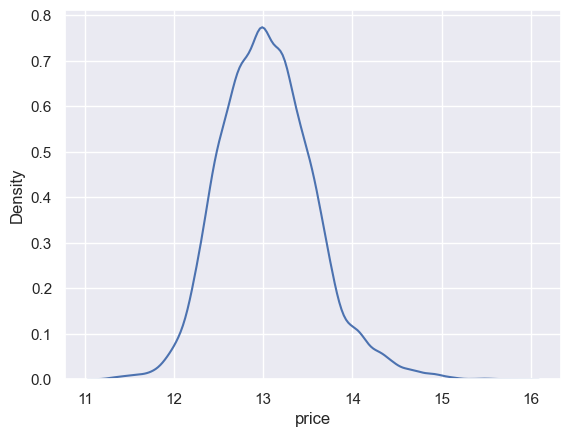

In [34]:
# y분포 확인
sns.kdeplot(y)
plt.show()

In [35]:
# train 전체 자료형 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 0 to 15030
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             15031 non-null  int32  
 1   bedrooms         15031 non-null  int64  
 2   bathrooms        15031 non-null  float64
 3   sqft_living      15031 non-null  float64
 4   sqft_lot         15031 non-null  float64
 5   floors           15031 non-null  float64
 6   waterfront       15031 non-null  int64  
 7   view             15031 non-null  int64  
 8   condition        15031 non-null  int64  
 9   grade            15031 non-null  int64  
 10  sqft_above       15031 non-null  float64
 11  sqft_basement    15031 non-null  float64
 12  yr_built         15031 non-null  int64  
 13  yr_renovated     15031 non-null  float64
 14  zipcode          15031 non-null  int64  
 15  lat              15031 non-null  float64
 16  long             15031 non-null  float64
 17  sqft_living1

In [36]:
# rmse 함수
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [37]:
# 모델 import
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

In [38]:
# 스코어 계산 함수
def get_scores(models, train, y):
        df = {}

        for model in models:
            model_name = model.__class__.__name__
            X_train, X_test, y_train, y_test = \
                train_test_split(train, y, random_state=random_state, test_size=0.2)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            if model_name in df:
                model_name = model_name + str(models.index(model))
            df[model_name] = rmse(y_test, y_pred)
            score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
        return (score_df)       

In [39]:
# 그리드 탐색
from sklearn.model_selection import GridSearchCV

In [40]:
# GridSearch 함수 선언
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            cv=5, verbose=verbose, n_jobs=n_jobs)
    grid_model.fit(train, y)
    grid_model.cv_results_

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results['RMSLE'] = -1 * results['score']
    results = results.sort_values(['RMSLE'])

    return results

In [41]:
# save_submission 함수 선언
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    
    prediction = model.predict(test)
    prediction = prediction
    
    data_dir = './data_Kaggle'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    
    submission['price'] = np.expm1(prediction)
    
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

### 7) 마지막 시도

In [42]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=0        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

In [43]:
# save_submission 함수 선언
def save_model(y_pred, model_name, rmsle=None):
    data_dir = './data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    
    submission['price'] = np.expm1(y_pred)
    
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [47]:
# 탐색할 parameter 준비
param_grid = {
    'boosting' : ['goss', 'gbdt'],
    'n_estimators': [1400, 1600],
    'max_depth': [5, 9],
    'learning_rate': [0.015, 0.019]
    #'num_leaves' : [127, 255, 511]
}

In [48]:
model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=-1)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss


,boosting,learning_rate,max_depth,n_estimators,score,RMSLE
1,goss,0.015,5,1600,-0.155087,0.155087
5,goss,0.019,5,1600,-0.155170,0.155170
4,goss,0.019,5,1400,-0.155171,0.155171
0,goss,0.015,5,1400,-0.155202,0.155202
2,goss,0.015,9,1400,-0.155270,0.155270
3,goss,0.015,9,1600,-0.155341,0.155341
6,goss,0.019,9,1400,-0.155502,0.155502
13,gbdt,0.019,5,1600,-0.155569,0.155569
15,gbdt,0.019,9,1600,-0.155617,0.155617
14,gbdt,0.019,9,1400,-0.155686,0.155686


In [46]:
# 탐색할 parameter 준비
param_grid = {
    'n_estimators': [500, 900],
    'max_depth': [5, 9],
    'learning_rate': [0.05, 0.5]
    #'num_leaves' : [127, 255, 511]
}
model = XGBRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=-1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
1,0.05,5,900,-0.155128,0.155128
0,0.05,5,500,-0.155530,0.155530
2,0.05,9,500,-0.157495,0.157495
3,0.05,9,900,-0.157995,0.157995
4,0.50,5,500,-0.175606,0.175606
5,0.50,5,900,-0.176264,0.176264
6,0.50,9,500,-0.182919,0.182919
7,0.50,9,900,-0.182919,0.182919


In [61]:
xgboost = XGBRegressor(learning_rate=0.05, max_depth=5, n_estimators=900, random_state=random_state)
lightgbm0 = LGBMRegressor(boosting='goss', learning_rate=0.015, max_depth=5, n_estimators=1600, random_state=random_state)
lightgbm1 = LGBMRegressor(boosting='gbdt', learning_rate=0.019, max_depth=5, n_estimators=1600, random_state=random_state)
lightgbm2 = LGBMRegressor(boosting='goss', learning_rate=0.019, max_depth=5, n_estimators=1900, random_state=random_state)
lightgbm3 = LGBMRegressor(boosting='gbdt', learning_rate=0.019, max_depth=9, n_estimators=1600, random_state=random_state)
ereg = VotingRegressor(estimators=[('xgb', xgboost), ('lgbm0', lightgbm0), ('lgbm1', lightgbm1), ('lgbm2', lightgbm2), ('lgbm3', lightgbm3)])

In [ ]:
n_folds = 8
def rmsle_cv(model, X_train, y_train):
    kf = KFold(n_folds, shuffle=True, random_state=random_state).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [50]:
gb = GradientBoostingRegressor(random_state=random_state)

In [51]:
xgboost = xgb.XGBRegressor(random_state=random_state)

In [52]:
lightgb = lgb.LGBMRegressor(random_state=random_state)

In [56]:

# X_train, X_test, y_train, y_test = \
#                 train_test_split(train, y, random_state=random_state, test_size=0.2)

# score = rmsle_cv(gb, X_train, y_train)
# gb_score = score.mean()
# print("GradientBoostingRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# score = rmsle_cv(xgboost, X_train, y_train)
# xgb_score = score.mean()
# print("XGBRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# score = rmsle_cv(lightgb, X_train, y_train)
# lgb_score = score.mean()
# print("LGBMRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
 

In [53]:
stack = StackingCVRegressor(regressors=(gb, xgboost, lightgb),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True,
                                n_jobs=-1)

In [57]:
# score = rmsle_cv(stack, X_train, y_train)
# print("stack score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [62]:
## 1분 20초 정도 소요
#get_scores([xgboost, lightgbm0, lightgbm1, lightgbm2, lightgbm3, ereg, stack], train, y)
get_scores([ereg, stack], train, y)

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss


,RMSE
VotingRegressor,139165.114139
StackingCVRegressor,133631.299885


In [63]:
## 50초 정도 소요
##save_submission(ereg, train, y, test, "voting", "220923_1142")

nowdt = "220923_1336"
save_submission(stack, train, y, test, "STACK", nowdt)
save_submission(ereg, train, y, test, "VOTE", nowdt)

./data_Kaggle/submission_STACK_RMSLE_220923_1336.csv saved!
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
./data_Kaggle/submission_VOTE_RMSLE_220923_1336.csv saved!
